### Imports of libraries
First we import necessary modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Import the data
Import data about athletes attending events. An event can be basketball turnament or running 400m. The dataset includes data untli year 2016.

In [2]:
athletes = pd.read_csv("athlete_events.csv")
athletes.head(25)
#import os
#print(os.listdir("../input/")) # there will be subfolder

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


### Create dummy fields for different medals
To help in future manipulatio we are turning textual field Medal (Gold, Bronze, Silver, NaN) in separate features. Since not all athletes won medals "no medal" is real possiblity. Thus we don't have to remove any dummy fields.

In [3]:
athletes = pd.concat([athletes, pd.get_dummies(athletes['Medal'])], axis = 1)
athletes = athletes.drop('Medal', axis = 1)
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0,0


### Let's see how the dataset looks like
Check describe() and info().

In [4]:
athletes.describe()

,ID,Age,Height,Weight,Year,Bronze,Gold,Silver
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480,0.049038,0.049322,0.048378
std,39022.286345,6.393561,10.518462,14.348020,29.877632,0.215948,0.216540,0.214564
min,1.000000,10.000000,127.000000,25.000000,1896.000000,0.000000,0.000000,0.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000,0.000000,0.000000,0.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000,0.000000,0.000000,0.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000,0.000000,0.000000,0.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000,1.000000,1.000000,1.000000


In [5]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Bronze    271116 non-null uint8
Gold      271116 non-null uint8
Silver    271116 non-null uint8
dtypes: float64(3), int64(2), object(9), uint8(3)
memory usage: 29.7+ MB


### Remove data
Because of all the changes that happened in 1990s it is not easily possible to follow achievements and compare before and after. Thus, we remove records older then 1994.

In [6]:
athletes1994 = athletes[athletes['Year']>1993]

In [7]:
athletes1994.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Bronze,Gold,Silver
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0,0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0,0,0
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",0,0,0
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,0,0,0
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,0,0,0


### Group athletes into teams
We are not interested in performance of an athlete but teams (e.g. China basketball team). Therefore we group same country athletes into teams by grouping by year, season, team and event. Furthermore we sum medals. If leave it this way number of medals of group sports will be multiplied. We actually want to get number of medals per event. Thus we change every number of medals > 0 to 1.After that we reset index to return the data into dataframe.
Since I know I will do this more then once, I'll make a function out of it (I know because I've already done this :) )

In [8]:
def prepareMedals(basicData):
    medalsDF = basicData.groupby(['Year','Season','Team','Event'])['Gold','Silver','Bronze'].sum()
    medalsDF.loc[medalsDF['Gold'] > 0, 'Gold'] = 1
    medalsDF.loc[medalsDF['Silver'] > 0, 'Silver'] = 1
    medalsDF.loc[medalsDF['Bronze'] > 0, 'Bronze'] = 1
    medalsDF.reset_index(inplace = True )
    return medalsDF

In [9]:
medals = prepareMedals(athletes1994)
medals.head(25)

,Year,Season,Team,Event,Gold,Silver,Bronze
0,1994,Winter,American Samoa,Bobsleigh Men's Two,0,0,0
1,1994,Winter,Andorra,Alpine Skiing Men's Combined,0,0,0
2,1994,Winter,Andorra,Alpine Skiing Men's Giant Slalom,0,0,0
3,1994,Winter,Andorra,Alpine Skiing Men's Slalom,0,0,0
4,1994,Winter,Andorra,Alpine Skiing Men's Super G,0,0,0
5,1994,Winter,Andorra,Alpine Skiing Women's Giant Slalom,0,0,0
6,1994,Winter,Andorra,Alpine Skiing Women's Slalom,0,0,0
7,1994,Winter,Andorra,Alpine Skiing Women's Super G,0,0,0
8,1994,Winter,Argentina,Alpine Skiing Men's Combined,0,0,0
9,1994,Winter,Argentina,Alpine Skiing Men's Downhill,0,0,0


### Group again
Now we group again. This time there will be no more athletes and no more events. Only teams. This dataframe shows how many medals were won by each team.

In [10]:
medalsTeams = medals.groupby(['Year','Season','Team'])['Gold','Silver','Bronze'].sum()
print(medalsTeams.head(25))

                                    Gold  Silver  Bronze
Year Season Team                                        
1994 Winter American Samoa             0       0       0
            Andorra                    0       0       0
            Argentina                  0       0       0
            Armenia                    0       0       0
            Australia                  0       0       1
            Austria                    2       3       4
            Austria-1                  0       0       0
            Austria-2                  0       0       0
            Belarus                    0       2       0
            Belgium                    0       0       0
            Bermuda                    0       0       0
            Bosnia and Herzegovina     0       0       0
            Brazil                     0       0       0
            Bulgaria                   0       0       0
            Canada                     3       6       3
            Canada-1           

### Some of the teams have more then one version. 
E.g. there is Austria, but also Austria-1 and Austria-2. This three should be merged. We will do this by 1st creating the list of teams with "-" in it. We create this list from initial dataframe.

In [11]:
# this is list of all the "duplicated" teams (Like "Austria-1")
the_list = athletes1994['Team'][athletes1994['Team'].str.contains("-")].unique() 

### Remove last 2 chars from the names of the team.
Now we take the list and find all the teams that are in the list in original list of athletes. There we remove last 2 chars from team names.

In [12]:
for i in the_list:
    # we go back to initial list athletes and remove last 2 chars if the name of the team is in the_list.
    athletes1994.loc[athletes1994['Team']==i,'Team']=i[:-2]
for i in the_list:
    # this is actual optional since this is the first list with old records.
    athletes.loc[athletes['Team']==i,'Team']=i[:-2]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
# this is repeated code, just for checking if we merged the teams.
medals = prepareMedals(athletes1994)
medalsTeams = medals.groupby(['Year','Season','Team'])['Gold','Silver','Bronze'].sum()
medalsTeams.reset_index(inplace = True)
print(medalsTeams.head(20))

    Year  Season                    Team  Gold  Silver  Bronze
0   1994  Winter          American Samoa     0       0       0
1   1994  Winter                 Andorra     0       0       0
2   1994  Winter               Argentina     0       0       0
3   1994  Winter                 Armenia     0       0       0
4   1994  Winter               Australia     0       0       1
5   1994  Winter                 Austria     2       3       4
6   1994  Winter                 Belarus     0       2       0
7   1994  Winter                 Belgium     0       0       0
8   1994  Winter                 Bermuda     0       0       0
9   1994  Winter  Bosnia and Herzegovina     0       0       0
10  1994  Winter                  Brazil     0       0       0
11  1994  Winter                Bulgaria     0       0       0
12  1994  Winter                  Canada     3       6       4
13  1994  Winter                   Chile     0       0       0
14  1994  Winter                   China     0       1 

In [14]:
medals.to_csv('medalje.csv')
medalsTeams.to_csv('medalsTeam.csv')

### Want to see who is the best
Adding sum of medals and weighted sum. We need this to say who is the best :). Weighted sum is simple (multiplying number of gold medals with 3, silver with 2 and then summing up with bronze medals.

In [15]:
medalsTeams['Medal_pts'] = (3*medalsTeams['Gold'])+(2*medalsTeams['Silver'])+medalsTeams['Bronze']
medalsTeams['Medals'] = medalsTeams['Gold']+medalsTeams['Silver']+medalsTeams['Bronze']
medalsTeams.head(10)

,Year,Season,Team,Gold,Silver,Bronze,Medal_pts,Medals
0,1994,Winter,American Samoa,0,0,0,0,0
1,1994,Winter,Andorra,0,0,0,0,0
2,1994,Winter,Argentina,0,0,0,0,0
3,1994,Winter,Armenia,0,0,0,0,0
4,1994,Winter,Australia,0,0,1,1,1
5,1994,Winter,Austria,2,3,4,16,9
6,1994,Winter,Belarus,0,2,0,4,2
7,1994,Winter,Belgium,0,0,0,0,0
8,1994,Winter,Bermuda,0,0,0,0,0
9,1994,Winter,Bosnia and Herzegovina,0,0,0,0,0


### Now we sum up based on teams 
We sum up all medals that a team got in between 1994 and 2016.

In [16]:
medalsTeamsTotals = medalsTeams.groupby(['Team'])['Gold','Silver','Bronze','Medal_pts','Medals'].sum()
medalsTeamsTotals.reset_index(inplace = True)
medalsTeamsTotals.head(10)

,Team,Gold,Silver,Bronze,Medal_pts,Medals
0,Afghanistan,0,0,2,2,2
1,Albania,0,0,0,0,0
2,Algeria,4,4,5,25,13
3,American Samoa,0,0,0,0,0
4,Andorra,0,0,0,0,0
5,Angola,0,0,0,0,0
6,Antigua and Barbuda,0,0,0,0,0
7,Argentina,8,6,13,49,27
8,Armenia,2,5,9,25,16
9,Aruba,0,0,0,0,0


Text(0, 0.5, 'Bronze')

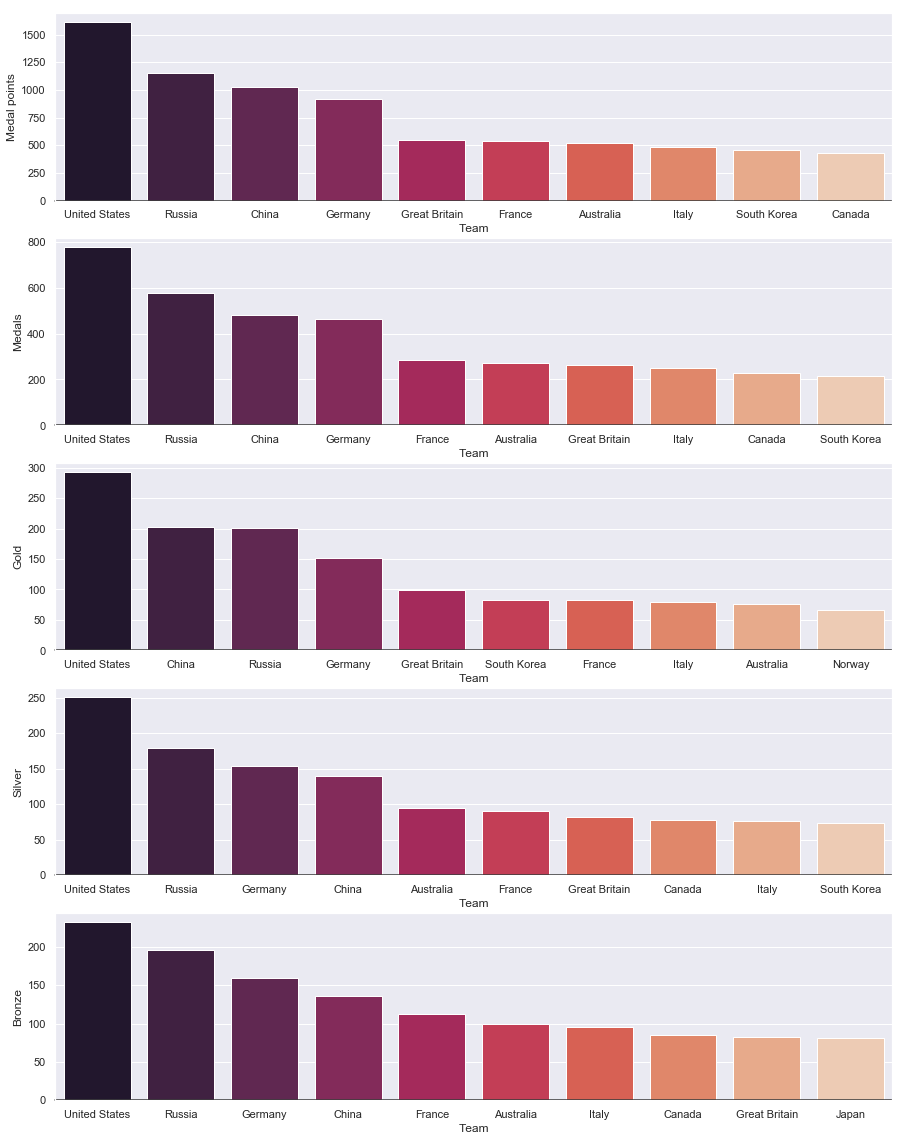

In [17]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15, 20), sharex=False)

#The first graph is who has the most medal points (weighted sum of medals)
sns.barplot(data=medalsTeamsTotals.sort_values(by='Medal_pts', ascending = False).head(10), x='Team', y='Medal_pts', palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Medal points")
#The second graph is who has the most medals 
sns.barplot(data=medalsTeamsTotals.sort_values(by='Medals', ascending = False).head(10), x='Team', y='Medals', palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Medals")
#The third graph is who has the most gold medals 
sns.barplot(data=medalsTeamsTotals.sort_values(by='Gold', ascending = False).head(10), x='Team', y='Gold', palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Gold")
#The fourth graph is who has the most silver medals 
sns.barplot(data=medalsTeamsTotals.sort_values(by='Silver', ascending = False).head(10), x='Team', y='Silver', palette="rocket", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("Silver")
#The fifth graph is who has the most bronze medals 
sns.barplot(data=medalsTeamsTotals.sort_values(by='Bronze', ascending = False).head(10), x='Team', y='Bronze', palette="rocket", ax=ax5)
ax5.axhline(0, color="k", clip_on=False)
ax5.set_ylabel("Bronze")


### So United States is the best?
Well based on number of weighted sum of medals and based on number of gold medals, United States is the best.

### What year was the best
OK, so we know it is United States that is THE best. But which year was best for which country?

First we create a list of countries and then we loop through the list getting the best years based on weighted sum of medals.

In [18]:
listOfCountries = medalsTeams['Team'].unique()
bestyears = pd.DataFrame(columns=['Team','Year','Medal_pts'])
for country in listOfCountries:
    temp = medalsTeams.loc[medalsTeams['Team']==country].sort_values(by='Medal_pts', ascending = False).head(1)[['Team','Year','Medal_pts']]
    frames = [bestyears, temp]
    bestyears = pd.concat(frames)

### We do not want to show countries that have too few medals.
That is not because we do not want to show them but it is crowdy. So we remove those that at best years had less or equal to 5 medal. (My Croatia is still in the list :) ). Then we draw bubble plot where size of bubbles is defined by weighted sum of medals.

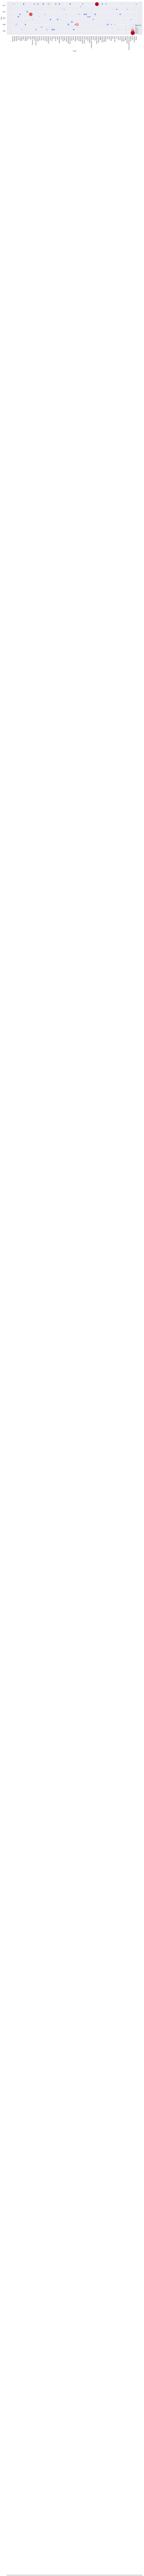

In [19]:
bestyears = bestyears.loc[bestyears['Medal_pts']>5]
#since Medal_pts is type object we must change it into float or int.
bestyears.loc[:,'Medal_pts'] = bestyears.Medal_pts.astype(np.float)
g, (ax1) = plt.subplots(1, 1, figsize=(20, 5))
sns.scatterplot(data = bestyears, x = 'Team', y = 'Year', size ='Medal_pts', sizes=(5,1000) , hue ='Medal_pts' ,palette="coolwarm", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set(ylim=(1992, 2018))
ax1.set_ylabel("Year")
for item in ax1.get_xticklabels():
    item.set_rotation(90)

### Is number of medals enough?
Probably not. We need to see how many events were at each game to see potentially maximal number of medals. Right?

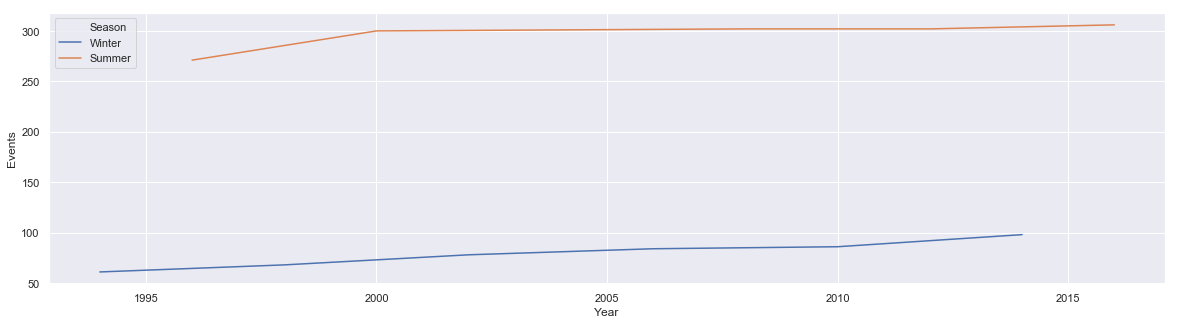

In [20]:
EventsPerGames=pd.DataFrame(athletes1994.groupby(['Year','Season'])['Event'].nunique())
EventsPerGames.columns=['Events']
EventsPerGames.reset_index(inplace = True)
g, (ax1) = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(data=EventsPerGames,x='Year',y='Events', hue='Season', ax=ax1)

### We can not group all games since there is a difference between Winter and Summer games
Since there is big difference in number of events between Summer and Winter olympic games we need to see "best years" based on the season.

### First we do winter games and repeat everything else.

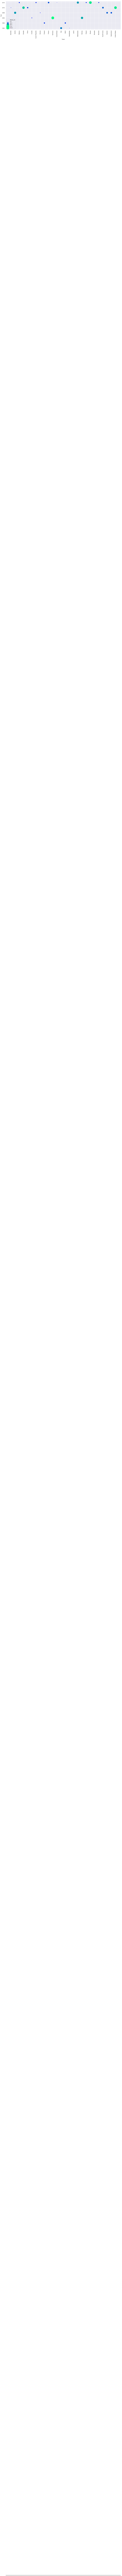

In [21]:
#list of countries already exists
bestyearsW = pd.DataFrame(columns=['Team','Year','Medal_pts'])
for country in listOfCountries:
    temp = medalsTeams.loc[(medalsTeams['Team']==country) & (medalsTeams['Season']=='Winter')].sort_values(by='Medal_pts', ascending = False).head(1)[['Team','Year','Medal_pts']]
    frames = [bestyearsW, temp]
    bestyearsW = pd.concat(frames)
bestyearsW = bestyearsW.loc[bestyearsW['Medal_pts']>5]
#since Medal_pts is type object we must change it into float or int.
bestyearsW.loc[:,'Medal_pts'] = bestyearsW.Medal_pts.astype(np.float)
g, (ax1) = plt.subplots(1, 1, figsize=(20, 5))
# color palette for the graph "winter" :)
sns.scatterplot(data = bestyearsW, x = 'Team', y = 'Year', size ='Medal_pts', sizes=(5,750), hue ='Medal_pts', palette="winter", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
# lets define max and min of y axis based on actual data, and set ticks on actual data
yearsTicks = bestyearsW['Year'].unique().tolist()
yearsTicks.sort()
ax1.set(ylim=(yearsTicks[0]-1, yearsTicks[-1]+1),yticks = (yearsTicks))
ax1.set_ylabel("Year")
for item in ax1.get_xticklabels():
    item.set_rotation(90)

### Now summer!

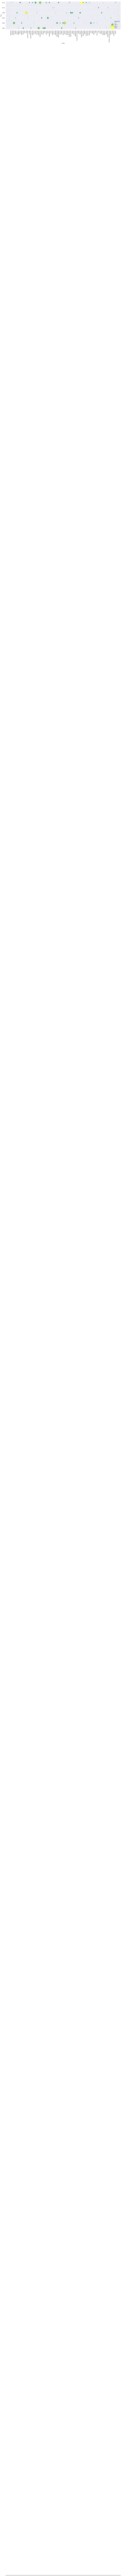

In [22]:
#list of countries already exists
bestyearsS = pd.DataFrame(columns=['Team','Year','Medal_pts'])
for country in listOfCountries:
    temp = medalsTeams.loc[(medalsTeams['Team']==country) & (medalsTeams['Season']=='Summer')].sort_values(by='Medal_pts', ascending = False).head(1)[['Team','Year','Medal_pts']]
    frames = [bestyearsS, temp]
    bestyearsS = pd.concat(frames)
bestyearsS = bestyearsS.loc[bestyearsS['Medal_pts']>5]
#since Medal_pts is type object we must change it into float or int.
bestyearsS.loc[:,'Medal_pts'] = bestyearsS.Medal_pts.astype(np.float)
g, (ax1) = plt.subplots(1, 1, figsize=(20, 5))
# color palette for the graph "summer" 
sns.scatterplot(data = bestyearsS, x = 'Team', y = 'Year', size ='Medal_pts', sizes=(5,1000), hue ='Medal_pts', palette="summer", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
# lets define max and min of y axis based on actual data, and set ticks on actual data
yearsTicks = bestyearsS['Year'].unique().tolist()
yearsTicks.sort()
ax1.set(ylim=(yearsTicks[0]-1, yearsTicks[-1]+1),yticks = (yearsTicks))
ax1.set_ylabel("Year")
for item in ax1.get_xticklabels():
    item.set_rotation(90)

### Looking at the graph we see one interesting thing:
There is far less countries with more then 5 medals in best years in winter olypmics then on summer. Which is normal since there is less events. It would be interesting to see which countries are on one, or other or both lists? This require a bit of a different approach.
Firstly we create two separate dataframes out of list of teams winning more then 5 medals in summer and winter olympics. Then we in bost dataframes in column 'Game' added value (1 in summer and 2 in winter). Then we merged two dataframes and summed 'Game' column and got new frame. In new frame if value of column 'Game' is 1 then the team won more than 5 medals only in summer, if it is 2 then the team won more then 5 medals only in winter, and if it is three then in both. Drew the graph with changed y tick labels to reflect the logic.

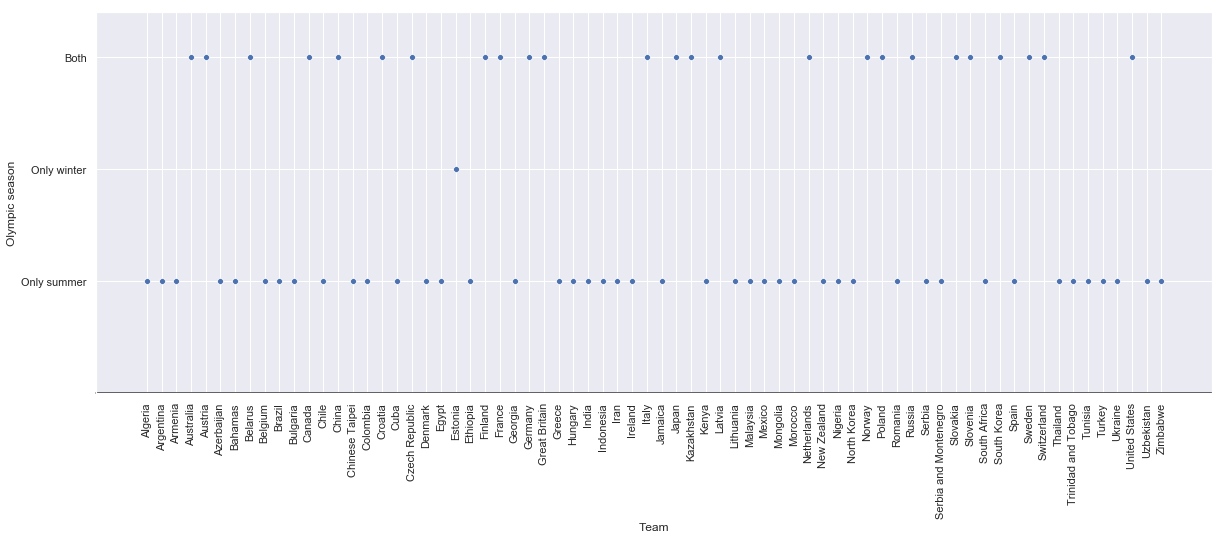

In [23]:
summerCountries = pd.DataFrame(columns=['Team','Game'])
summerCountries['Team'] = bestyearsS['Team']
summerCountries['Game'] = 1
winterCountries = pd.DataFrame(columns=['Team','Game'])
winterCountries['Team'] = bestyearsW['Team']
winterCountries['Game'] = 2
frames = [winterCountries, summerCountries]
wsCountries = pd.concat(frames)
wsCountries = wsCountries.groupby(['Team'])['Game'].sum().to_frame()
wsCountries.reset_index(inplace = True)
g, (ax1) = plt.subplots(1, 1, figsize=(20, 7))
sns.scatterplot(data = wsCountries, x = 'Team', y = 'Game', palette="summer", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set(ylim=(0, 3.4),yticks = (1,2,3), yticklabels = ('Only summer','Only winter', 'Both'))
ax1.set_ylabel("Olympic season")
labels=ax1.get_yticklabels()
for item in ax1.get_xticklabels():
    item.set_rotation(90)


### So the top list of best countries should be also broken down.
What we saw in the data and graphs is that we cannot just summarize medals based on team due to two facts:
1. summer olympics have more events and thus more medals
2. not all teams perform on same level on winter and summer olympics
Thus we break the top list down!

In [24]:
medalsTeamsTotalsW = medalsTeams.loc[medalsTeams['Season']=='Winter'].groupby(['Team'])['Gold','Silver','Bronze','Medal_pts','Medals'].sum()
medalsTeamsTotalsW.reset_index(inplace = True)
print(medalsTeamsTotalsW.head(10))
medalsTeamsTotalsS = medalsTeams.loc[medalsTeams['Season']=='Summer'].groupby(['Team'])['Gold','Silver','Bronze','Medal_pts','Medals'].sum()
medalsTeamsTotalsS.reset_index(inplace = True)
print(medalsTeamsTotalsS.head(10))

             Team  Gold  Silver  Bronze  Medal_pts  Medals
0         Albania     0       0       0          0       0
1         Algeria     0       0       0          0       0
2  American Samoa     0       0       0          0       0
3         Andorra     0       0       0          0       0
4       Argentina     0       0       0          0       0
5         Armenia     0       0       0          0       0
6       Australia     5       3       4         25      12
7         Austria    25      33      41        182      99
8      Azerbaijan     0       0       0          0       0
9         Belarus     6       4       5         31      15
                  Team  Gold  Silver  Bronze  Medal_pts  Medals
0          Afghanistan     0       0       2          2       2
1              Albania     0       0       0          0       0
2              Algeria     4       4       5         25      13
3       American Samoa     0       0       0          0       0
4              Andorra     0   

### Now we draw graphs for summer and winter
To avoid writing down each graph separatelly we make for loop. We loop through rows and columns defined in variables at the beggining. The rest is python at its best.

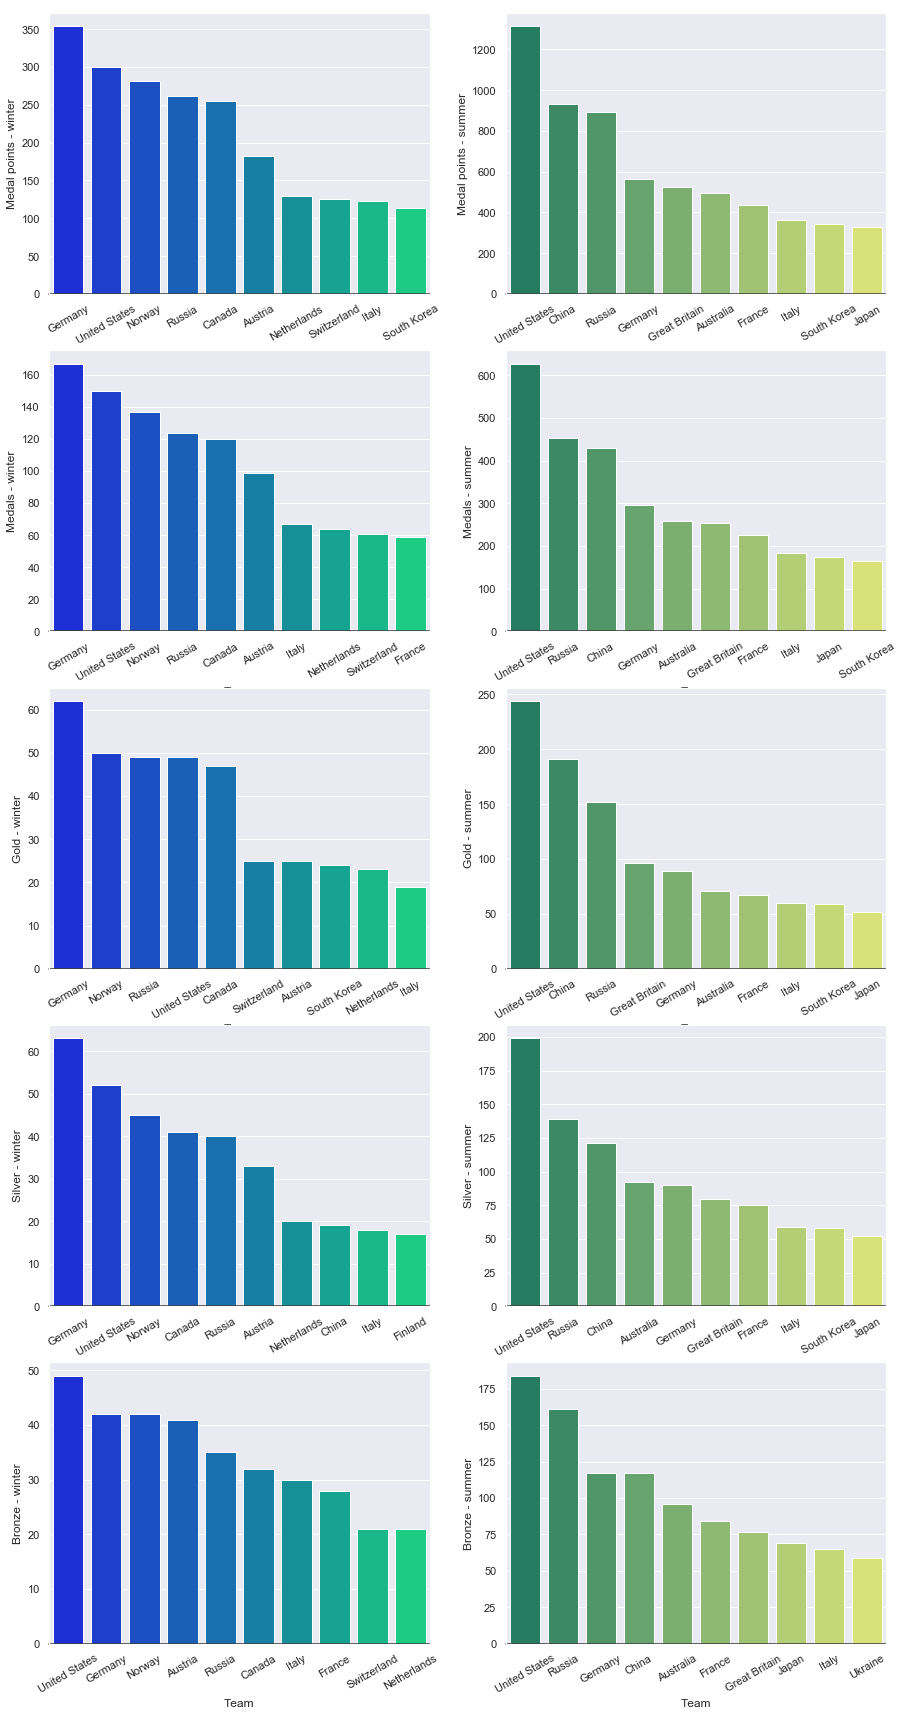

In [25]:
rows = 5
columns = 2
f, (ax1) = plt.subplots(rows, columns, figsize=(15, 30), sharex=False)

for x in range(rows):
    for y in range(columns):
        # dictionary containing options for labels of y axis - based on row number
        ylabelChoices = {0: ("Medal points"), 1: ("Medals"), 2: ("Gold"), 3: ("Silver"), 4: ("Bronze")}
        # dictionary containing options for sorting data - based on row number
        sortChoices = {0: ("Medal_pts"), 1: ("Medals"), 2: ("Gold"), 3: ("Silver"), 4: ("Bronze")}
        # dictionary of pallets which reflect season - based on column number
        palletChoices = {0: ("winter"), 1: ("summer")}
        # dictionary of variables from which we get winter / summer data - based on column number
        sourceChoices = {0: (medalsTeamsTotalsW), 1: (medalsTeamsTotalsS)}
        sns.barplot(
            data=sourceChoices.get(y,'').sort_values(by=sortChoices.get(x, ''), ascending = False).head(10)
            , x='Team'
            , y=sortChoices.get(x, '')
            , palette=palletChoices.get(y,'')
            , ax=ax1[x,y])
        ax1[x,y].axhline(0, color="k", clip_on=False)
        ax1[x,y].set_ylabel(ylabelChoices.get(x, '') + " - " + palletChoices.get(y,''))
        for item in ax1[x,y].get_xticklabels():
            item.set_rotation(30)


### So United States is not so mighty!
Specially if we look at the number of gold medals, United States is not even in Top 3. So the might of US comes from summer olympic games. Let's see where this might comes from - in other words which events Top 5 countries in both season get most of the medals.The parameter to check who is in Top 5 will be Medal points. In other words for winter following countries are top 5:
1. Germany
2. United States
3. Norway
4. Russia
5. Canada

For summer season top 5 countries are:
1. United States
2. China
3. Russia 
4. Germany
5. Australia

We will start from dataframe "medals".

In [26]:
summerCountries = ['United States', 'China', 'Russia', 'Germany', 'Australia']
winterCountries = ['Germany', 'United States', 'Norway', 'Russia', 'Canada']

summerTop5CountriesMedals = {}
winterTop5CountriesMedals = {}

def returnTop5CountriesMedals (list, season):
    tempDict = {}
    for c in list:
        tempDict[c] = medals.loc[(medals['Season']==season) & 
                                 (medals['Team']==c) & 
                                 ((medals['Gold'] > 0)|
                                  (medals['Silver'] > 0)|
                                  (medals['Bronze'] > 0))][['Team','Event','Gold','Silver','Bronze']]
        tempDict[c] = tempDict[c].groupby(['Team','Event'])['Gold','Silver','Bronze'].sum()
        tempDict[c].reset_index(inplace = True)
        tempDict[c]['Medal_pts'] = (3*tempDict[c]['Gold'])+(2*tempDict[c]['Silver'])+tempDict[c]['Bronze']
    return tempDict

summerTop5CountriesMedals = returnTop5CountriesMedals (summerCountries, 'Summer')
winterTop5CountriesMedals = returnTop5CountriesMedals (winterCountries, 'Winter')

### Let's see the list
Let's see list of top 10 events for  each county and each season where the teams got highest number of medal points.

In [27]:
def printingTop5Countries(dict, heading):
    print(heading)
    for c in dict:
        print(c)
        display(dict[c].sort_values(by='Medal_pts', ascending = False).head(10)[['Event','Gold','Silver','Bronze', 'Medal_pts']])
        print('\n\r')
    
printingTop5Countries(summerTop5CountriesMedals,'Top 10 events of top 5 countries for Summer Olympic Games')
printingTop5Countries(winterTop5CountriesMedals,'Top 10 events of top 5 countries for Winter Olympic Games')

Top 10 events of top 5 countries for Summer Olympic Games
United States


,Event,Gold,Silver,Bronze,Medal_pts
139,Swimming Men's 200 metres Backstroke,6,3,1,25
148,Swimming Men's 400 metres Individual Medley,5,4,1,24
135,Swimming Men's 100 metres Backstroke,6,2,1,23
10,Athletics Men's 400 metres,4,3,3,21
143,Swimming Men's 200 metres Individual Medley,4,3,2,20
20,Athletics Men's Shot Put,3,4,2,19
41,Basketball Women's Basketball,6,0,0,18
145,Swimming Men's 4 x 100 metres Medley Relay,6,0,0,18
5,Athletics Men's 110 metres Hurdles,2,5,2,18
29,Athletics Women's 4 x 400 metres Relay,6,0,0,18




China


,Event,Gold,Silver,Bronze,Medal_pts
120,Table Tennis Men's Singles,5,5,3,28
123,Table Tennis Women's Singles,6,4,2,28
40,Diving Women's Springboard,6,4,1,27
19,Badminton Women's Doubles,5,2,3,22
36,Diving Men's Springboard,5,2,2,21
39,Diving Women's Platform,4,3,1,19
20,Badminton Women's Singles,4,2,2,18
35,Diving Men's Platform,3,3,2,17
17,Badminton Men's Singles,4,1,3,17
136,Weightlifting Men's Bantamweight,3,3,1,16




Russia


,Event,Gold,Silver,Bronze,Medal_pts
110,Rhythmic Gymnastics Women's Individual,5,4,1,24
109,Rhythmic Gymnastics Women's Group,5,0,1,16
146,Synchronized Swimming Women's Team,5,0,0,15
145,Synchronized Swimming Women's Duet,5,0,0,15
108,Modern Pentathlon Men's Individual,4,1,0,14
96,Gymnastics Women's Uneven Bars,4,0,0,12
178,"Wrestling Men's Middleweight, Freestyle",3,1,1,12
21,Athletics Women's High Jump,3,0,2,11
181,"Wrestling Men's Super-Heavyweight, Greco-Roman",2,2,1,11
176,"Wrestling Men's Lightweight, Freestyle",3,1,0,11




Germany


,Event,Gold,Silver,Bronze,Medal_pts
36,"Canoeing Women's Kayak Fours, 500 metres",4,2,0,16
101,Rowing Women's Quadruple Sculls,4,1,1,15
23,"Canoeing Men's Canadian Doubles, 1,000 metres",4,1,1,15
61,"Equestrianism Mixed Dressage, Team",4,1,0,14
60,"Equestrianism Mixed Dressage, Individual",1,4,3,14
5,Athletics Men's Discus Throw,3,1,1,12
35,"Canoeing Women's Kayak Doubles, 500 metres",2,3,0,12
108,"Shooting Men's Rapid-Fire Pistol, 25 metres",3,1,1,12
34,"Canoeing Men's Kayak Singles, Slalom",3,0,2,11
31,"Canoeing Men's Kayak Fours, 1,000 metres",2,2,1,11




Australia


,Event,Gold,Silver,Bronze,Medal_pts
83,"Swimming Men's 1,500 metres Freestyle",3,3,0,15
105,Swimming Women's 4 x 100 metres Medley Relay,2,4,0,14
101,Swimming Women's 200 metres Butterfly,1,4,2,13
95,Swimming Men's 400 metres Freestyle,3,1,1,12
70,Sailing Men's Two Person Dinghy,3,1,0,11
106,Swimming Women's 4 x 200 metres Freestyle Relay,1,3,1,10
56,Rowing Men's Coxless Fours,1,3,1,10
104,Swimming Women's 4 x 100 metres Freestyle Relay,3,0,1,10
97,Swimming Women's 100 metres Breaststroke,1,2,2,9
50,"Equestrianism Mixed Three-Day Event, Team",2,1,1,9




Top 10 events of top 5 countries for Winter Olympic Games
Germany


,Event,Gold,Silver,Bronze,Medal_pts
36,Luge Women's Singles,5,5,3,28
33,Luge Men's Singles,4,2,1,17
55,"Speed Skating Women's 5,000 metres",3,4,0,17
18,Bobsleigh Men's Four,4,1,1,15
34,Luge Mixed (Men)'s Doubles,3,1,2,13
2,Alpine Skiing Women's Combined,3,1,2,13
44,"Ski Jumping Men's Large Hill, Team",3,2,0,13
11,Biathlon Men's 4 x 7.5 kilometres Relay,3,2,0,13
19,Bobsleigh Men's Two,3,1,1,12
54,"Speed Skating Women's 3,000 metres",2,2,2,12




United States


,Event,Gold,Silver,Bronze,Medal_pts
46,Snowboarding Women's Halfpipe,3,2,3,16
42,Snowboarding Men's Halfpipe,3,2,3,16
49,"Speed Skating Men's 1,000 metres",3,1,2,13
16,Figure Skating Women's Singles,2,3,1,13
26,Ice Hockey Women's Ice Hockey,1,3,1,10
55,"Speed Skating Women's 1,000 metres",2,1,1,9
23,Freestyle Skiing Women's Moguls,1,2,2,9
11,Bobsleigh Women's Two,1,2,2,9
0,Alpine Skiing Men's Combined,2,1,0,8
50,"Speed Skating Men's 1,500 metres",1,2,1,8




Norway


,Event,Gold,Silver,Bronze,Medal_pts
5,Biathlon Men's 10 kilometres Sprint,3,3,1,16
8,Biathlon Men's 20 kilometres,3,2,1,14
4,Alpine Skiing Men's Super G,4,0,1,13
0,Alpine Skiing Men's Combined,2,2,1,11
28,Cross Country Skiing Women's 30 kilometres,1,3,2,11
21,Cross Country Skiing Men's 4 x 10 kilometres R...,2,2,0,10
45,"Ski Jumping Men's Normal Hill, Individual",2,1,2,10
36,Freestyle Skiing Women's Moguls,2,1,1,9
1,Alpine Skiing Men's Downhill,0,4,1,9
29,Cross Country Skiing Women's 4 x 5 kilometres ...,1,3,0,9




Russia


,Event,Gold,Silver,Bronze,Medal_pts
29,Figure Skating Mixed Pairs,5,3,0,21
28,Figure Skating Mixed Ice Dancing,3,3,2,17
27,Figure Skating Men's Singles,4,2,0,16
15,Cross Country Skiing Men's 50 kilometres,2,2,1,11
4,Biathlon Men's 4 x 7.5 kilometres Relay,1,2,2,9
22,Cross Country Skiing Women's 4 x 5 kilometres ...,3,0,0,9
19,Cross Country Skiing Women's 15 kilometres,1,2,2,9
24,Cross Country Skiing Women's 5/10 kilometres P...,2,1,0,8
8,Biathlon Women's 4 x 6 kilometres Relay,2,1,0,8
52,Speed Skating Men's 500 metres,1,2,0,7




Canada


,Event,Gold,Silver,Bronze,Medal_pts
25,Ice Hockey Women's Ice Hockey,4,1,0,14
10,Curling Men's Curling,3,2,0,13
29,Short Track Speed Skating Men's 500 metres,2,2,2,12
19,Freestyle Skiing Men's Moguls,3,1,0,11
28,"Short Track Speed Skating Men's 5,000 metres R...",3,1,0,11
24,Ice Hockey Men's Ice Hockey,3,1,0,11
48,Speed Skating Women's 500 metres,2,2,0,10
31,"Short Track Speed Skating Women's 3,000 metres...",0,4,2,10
11,Curling Women's Curling,2,1,2,10
21,Freestyle Skiing Women's Moguls,2,2,0,10


### Now the graphs
Next we will show graph for each country in top 5 for season of top 10 events with won medal points.

In [28]:
def drawGraphTop5Countries(dict, heading):
    if 'summer' in heading.lower():
        pallet = 'summer'
    else:
        pallet = 'winter'
    rows = 5
    columns = 1
    f, (ax1) = plt.subplots(rows, columns, figsize=(15, 40), sharex = True)
    axIndex = 0
    print(heading)
    for c in dict:
        sns.barplot(data=dict[c].sort_values(by='Medal_pts', ascending = False).head(10)
                    , y='Event'
                    , x='Medal_pts'
                    , palette=pallet
                    , ax=ax1[axIndex])
        ax1[axIndex].axvline(0, color="k", clip_on=False)
        ax1[axIndex].set_xlabel('Medal_pts')
        ax1[axIndex].set_ylabel('Events')
        ax1[axIndex].set_title(c)
        axIndex += 1

Top 10 events of top 5 countries for Summer Olympic Games


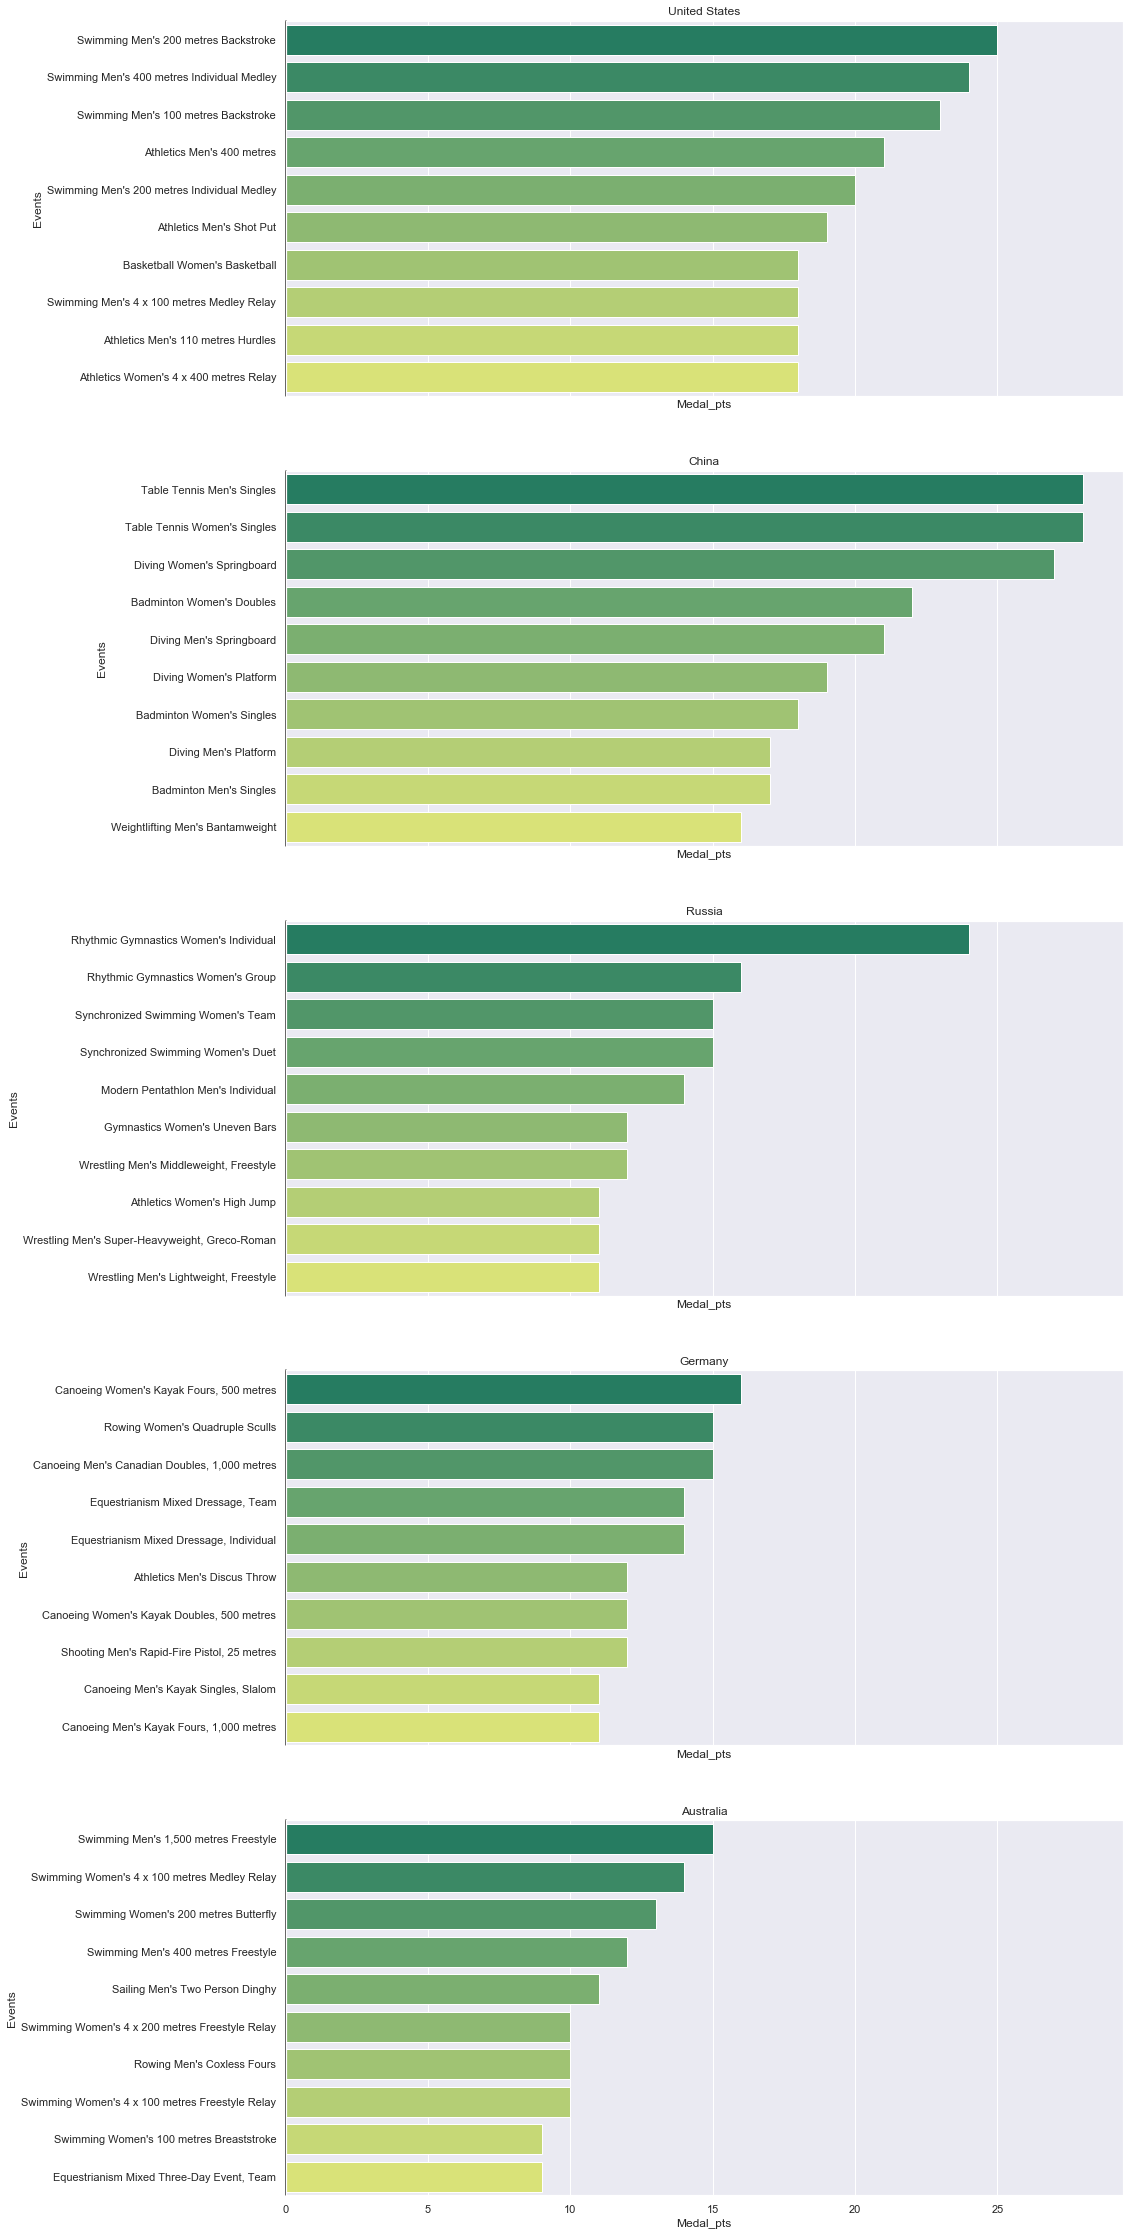

In [29]:
drawGraphTop5Countries(summerTop5CountriesMedals,'Top 10 events of top 5 countries for Summer Olympic Games')

Top 10 events of top 5 countries for Winter Olympic Games


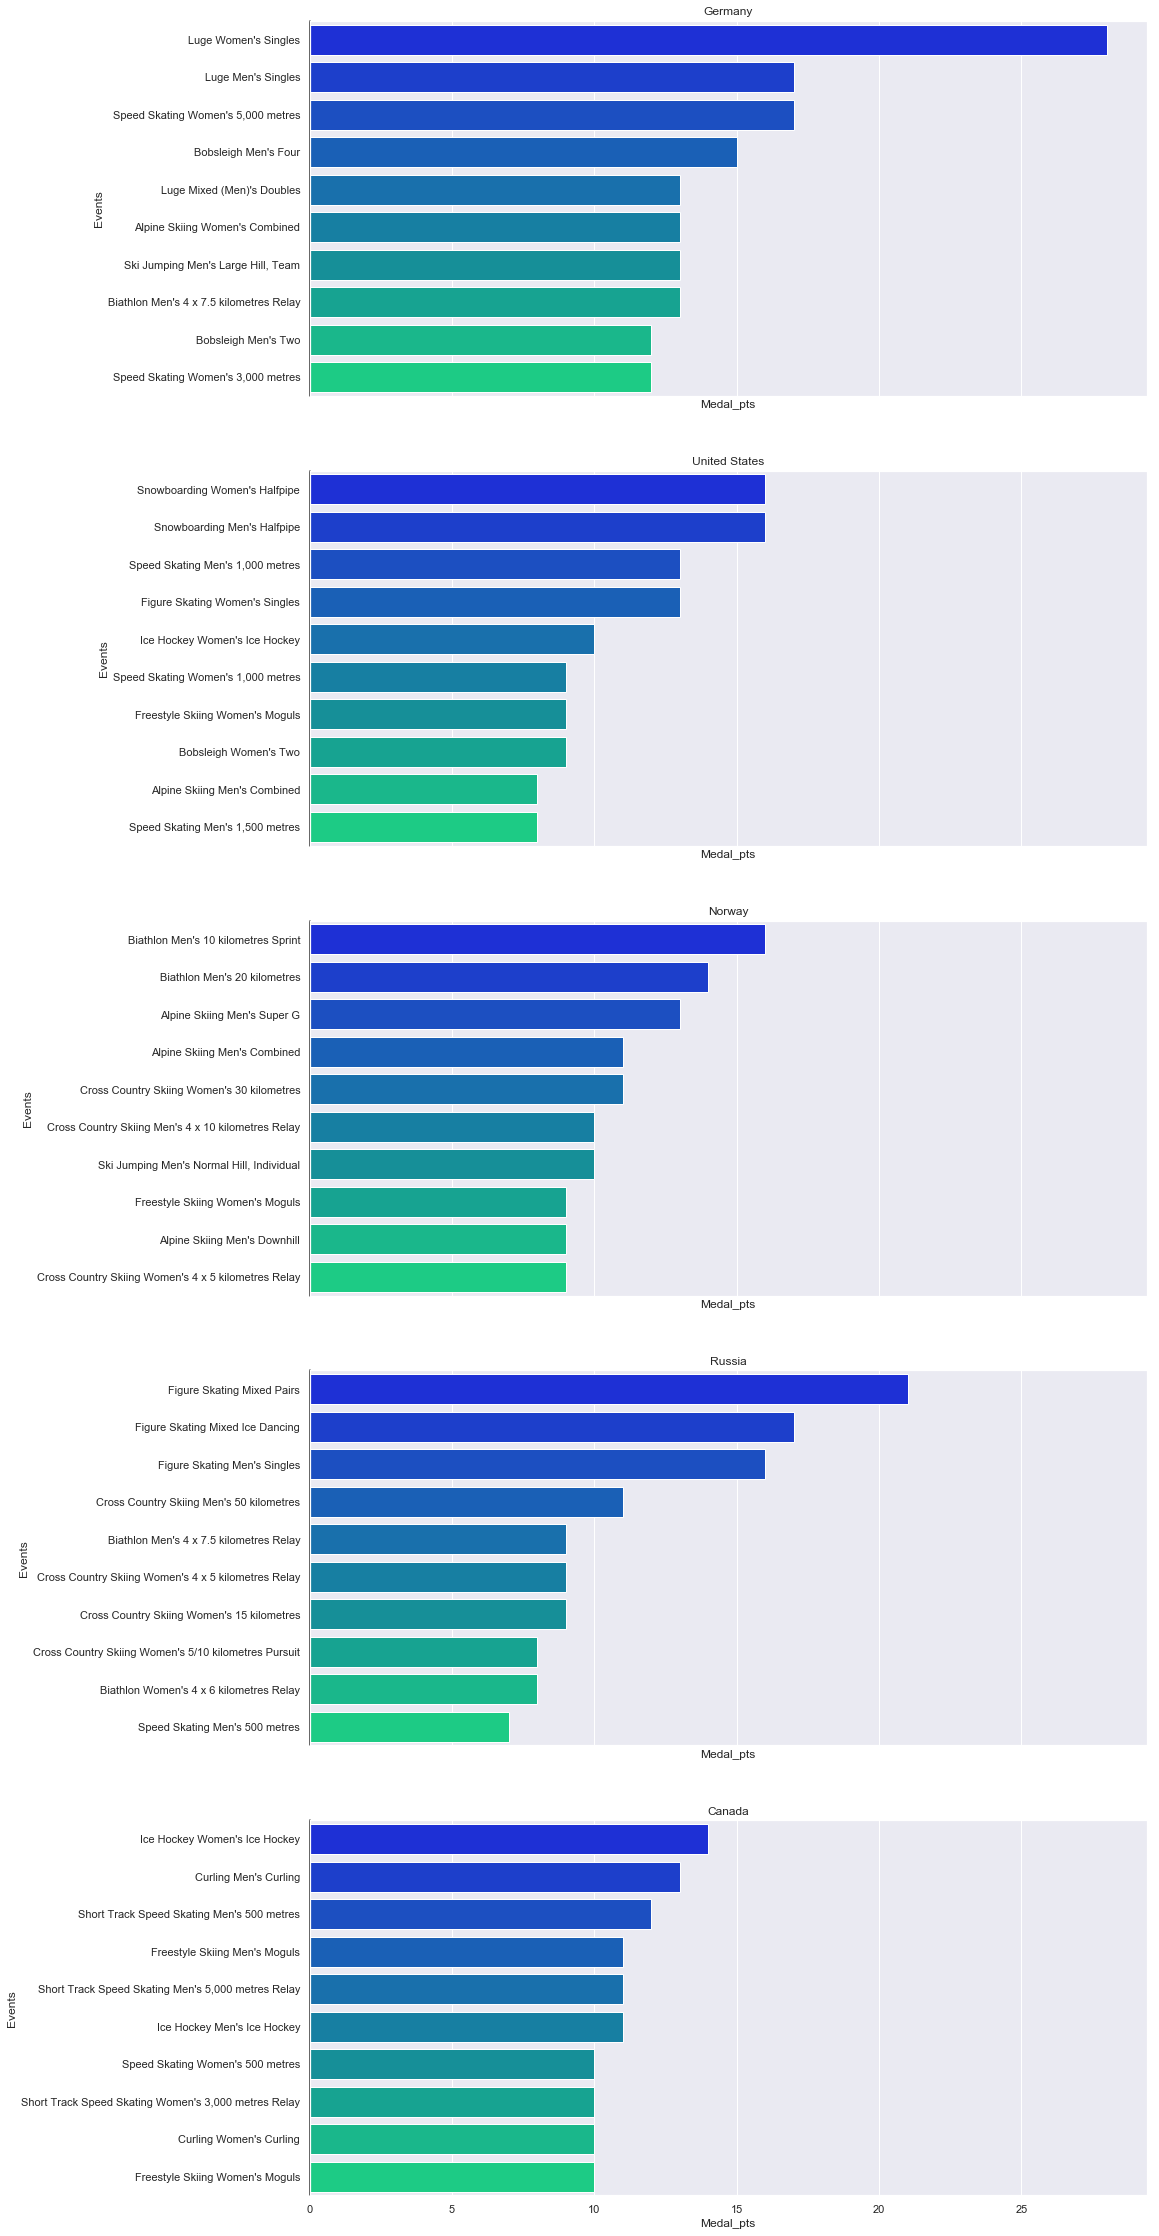

In [30]:
drawGraphTop5Countries(winterTop5CountriesMedals,'Top 10 events of top 5 countries for Winter Olympic Games')

### What have we learned?
Actually for me two things are surprising:
1. In winter games Germany event with most medal points has almost 2x more points then United States (the second country)
2. Top three China events (events with most medal points) have more points then the top United States event but United States have more points

It seams that United States' success does not come from dominating some events. Is it maybe widht of the team and number of events that brings success to United States? In that sense it would be good to compare number of medals with number of participants.

In [33]:
participants = pd.DataFrame(athletes1994.groupby(['Year','Season','Team'])['ID'].nunique())
participants.columns = ['UniqueParticipants']
participants.reset_index(inplace=True)
sports = pd.DataFrame(athletes1994.groupby(['Year','Season','Team'])['Sport'].nunique())
sports.columns = ['ParticipatingOnSports']
sports.reset_index(inplace=True)
events = pd.DataFrame(athletes1994.groupby(['Year','Season','Team'])['Event'].nunique())
events.columns = ['ParticipatingOnEvents']
events.reset_index(inplace=True)
medalsTeamsParticipants = medalsTeams.merge(participants, on=['Year','Team','Season']).merge(sports,  on=['Year','Team','Season']).merge(events, on=['Year','Team','Season'])
#medalsTeamsParticipants = pd.merge(medalsTeamsParticipants, sports, on=['Year','Team','Season'])
#medalsTeamsParticipants = pd.merge(medalsTeamsParticipants, sports, on=['Year','Team','Season'])
# we can check / test if number of participants was appended properly
display(participants.loc[participants['Team']=='Croatia'])
display(sports.loc[sports['Team']=='Croatia'])
display(events.loc[events['Team']=='Croatia'])
display(medalsTeamsParticipants.loc[medalsTeamsParticipants['Team']=='Croatia'])

,Year,Season,Team,UniqueParticipants
16,1994,Winter,Croatia,3
116,1996,Summer,Croatia,84
280,1998,Winter,Croatia,6
384,2000,Summer,Croatia,88
554,2002,Winter,Croatia,13
662,2004,Summer,Croatia,81
833,2006,Winter,Croatia,23
946,2008,Summer,Croatia,99
1150,2010,Winter,Croatia,19
1261,2012,Summer,Croatia,107


,Year,Season,Team,ParticipatingOnSports
16,1994,Winter,Croatia,2
116,1996,Summer,Croatia,14
280,1998,Winter,Croatia,3
384,2000,Summer,Croatia,12
554,2002,Winter,Croatia,5
662,2004,Summer,Croatia,14
833,2006,Winter,Croatia,6
946,2008,Summer,Croatia,15
1150,2010,Winter,Croatia,4
1261,2012,Summer,Croatia,17


,Year,Season,Team,ParticipatingOnEvents
16,1994,Winter,Croatia,7
116,1996,Summer,Croatia,57
280,1998,Winter,Croatia,10
384,2000,Summer,Croatia,53
554,2002,Winter,Croatia,18
662,2004,Summer,Croatia,57
833,2006,Winter,Croatia,20
946,2008,Summer,Croatia,66
1150,2010,Winter,Croatia,15
1261,2012,Summer,Croatia,53


,Year,Season,Team,Gold,Silver,Bronze,Medal_pts,Medals,UniqueParticipants,ParticipatingOnSports,ParticipatingOnEvents
16,1994,Winter,Croatia,0,0,0,0,0,3,2,7
116,1996,Summer,Croatia,1,1,0,5,2,84,14,57
280,1998,Winter,Croatia,0,0,0,0,0,6,3,10
384,2000,Summer,Croatia,1,0,1,4,2,88,12,53
554,2002,Winter,Croatia,3,1,0,11,4,13,5,18
662,2004,Summer,Croatia,1,2,2,9,5,81,14,57
833,2006,Winter,Croatia,1,2,0,7,3,23,6,20
946,2008,Summer,Croatia,0,2,3,7,5,99,15,66
1150,2010,Winter,Croatia,0,2,1,5,3,19,4,15
1261,2012,Summer,Croatia,3,1,2,13,6,107,17,53


### Let's define new features 
New feature will give us number of medals per perticipant, medals per sport and medals per event. Formula should be Medal_pts / participants. Numbers will be usually below 1.

Reality is that some sports (like basketball) require more participants then some other (skiing). Therefore medal_pts per event sounds like great indicator of success - how many did I achieve of my target.

In [35]:
medalsTeamsParticipants['MedalPtsPerPart'] = medalsTeamsParticipants['Medal_pts'] /medalsTeamsParticipants['UniqueParticipants']
medalsTeamsParticipants['MedalPtsPerSport'] = medalsTeamsParticipants['Medal_pts'] /medalsTeamsParticipants['ParticipatingOnSports']
medalsTeamsParticipants['MedalPtsPerEvent'] = medalsTeamsParticipants['Medal_pts'] /medalsTeamsParticipants['ParticipatingOnEvents']

display(medalsTeamsParticipants.loc[medalsTeamsParticipants['Team']=='Croatia'])

,Year,Season,Team,Gold,Silver,Bronze,Medal_pts,Medals,UniqueParticipants,ParticipatingOnSports,ParticipatingOnEvents,MedalPtsPerPart,MedalPtsPerSport,MedalPtsPerEvent
16,1994,Winter,Croatia,0,0,0,0,0,3,2,7,0.000000,0.000000,0.000000
116,1996,Summer,Croatia,1,1,0,5,2,84,14,57,0.059524,0.357143,0.087719
280,1998,Winter,Croatia,0,0,0,0,0,6,3,10,0.000000,0.000000,0.000000
384,2000,Summer,Croatia,1,0,1,4,2,88,12,53,0.045455,0.333333,0.075472
554,2002,Winter,Croatia,3,1,0,11,4,13,5,18,0.846154,2.200000,0.611111
662,2004,Summer,Croatia,1,2,2,9,5,81,14,57,0.111111,0.642857,0.157895
833,2006,Winter,Croatia,1,2,0,7,3,23,6,20,0.304348,1.166667,0.350000
946,2008,Summer,Croatia,0,2,3,7,5,99,15,66,0.070707,0.466667,0.106061
1150,2010,Winter,Croatia,0,2,1,5,3,19,4,15,0.263158,1.250000,0.333333
1261,2012,Summer,Croatia,3,1,2,13,6,107,17,53,0.121495,0.764706,0.245283


In [48]:
gdpdata = pd.read_csv('GDP by Country.csv', skiprows = range(0,4))

In [49]:
gdpdata.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,NaN


In [50]:
years = np.sort(athletes1994['Year'].unique())
print(str(years).split())

['[1994', '1996', '1998', '2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016]']


In [51]:
countries = np.sort(athletes1994['Team'].unique())
#print(countries)

In [52]:
years_s=str(years)
years_s = years_s[1:-1]
years_s = years_s.split()
cntrname = 'Country Name'
cntrcode = 'Country Code'
years_s.insert(0, cntrname)
print(years_s)

['Country Name', '1994', '1996', '1998', '2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016']


In [53]:
gdpdata_work = gdpdata[years_s]

In [54]:
gdpdata_work.head()

,Country Name,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
0,Aruba,1.330168e+09,1.379888e+09,1.665363e+09,1.873453e+09,1.941095e+09,2.228279e+09,2.421475e+09,2.791961e+09,2.467704e+09,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,4.128821e+09,5.285466e+09,7.057598e+09,1.019053e+10,1.593680e+10,2.053654e+10,2.005019e+10,1.946902e+10
2,Angola,4.059352e+09,7.526447e+09,6.445042e+09,9.129595e+09,1.249735e+10,1.964085e+10,4.178948e+10,8.417803e+10,8.247091e+10,1.153984e+11,1.267769e+11,9.533511e+10
3,Albania,1.985674e+09,3.314898e+09,2.707124e+09,3.632044e+09,4.435079e+09,7.314865e+09,8.992642e+09,1.288135e+10,1.192695e+10,1.231978e+10,1.322824e+10,1.186387e+10
4,Andorra,1.017549e+09,1.223945e+09,1.211932e+09,1.434430e+09,1.733117e+09,2.935659e+09,3.543257e+09,4.007353e+09,3.355695e+09,3.164615e+09,3.350736e+09,2.858518e+09


In [55]:
melted_gdp = gdpdata_work.melt(id_vars=['Country Name'], value_vars=years_s[1:], var_name='Years')
melted_gdp.columns=['Team','Year','GDP']

In [56]:
melted_gdp.head()

,Team,Year,GDP
0,Aruba,1994,1.330168e+09
1,Afghanistan,1994,NaN
2,Angola,1994,4.059352e+09
3,Albania,1994,1.985674e+09
4,Andorra,1994,1.017549e+09


# We want to detect which teams/countries from list of Olympic participan don't exist in GDP list

In [57]:
#get both list
olympic_countries = athletes1994['Team'].unique()
gdp_countries = gdpdata_work['Country Name'].unique()

In [58]:
#compare both list. Result is list of countries that competed on Olympic games and dont have GDP data.
np.setdiff1d(olympic_countries,gdp_countries)

array(['Bahamas', 'Bonaparte', 'Brentina', 'Briar', 'Brunei', 'Calimucho',
       'Cape Verde', 'Chinese Taipei', 'Clearwater',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Cook Islands',
       'Diabolo St Maurice', 'Digby', 'Don Schufro', 'Dow Jones', 'Egypt',
       'Elvis Va', 'Federated States of Micronesia', 'Floresco',
       'Galopin De La Font', 'Gambia', 'Gran Gesto', 'Great Britain',
       'Greenoaks Dundee', 'Guinea Bissau', 'Hong Kong',
       'Individual Olympic Athletes', 'Iran', 'Kyrgyzstan', 'Lancet',
       'Laos', 'Lucky Star', 'Macedonia', 'Mistral Hojris', 'Mythilus',
       'Nadine', 'Netherlands Antilles', 'North Korea', 'Notavel',
       'Orion', 'Oxalis', 'Palestine', 'Pop Art', 'Quando Quando',
       'Rambo', 'Ravel', 'Refugee Olympic Athletes', 'Relampago',
       'Russia', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Salinero', 'Satchmo',
       'Serbia and Montenegro', 'Slovakia', 'Solos Carex', 'South Korea',


## Looking at the list we could adapt following:

Bahamas -> Bahamas, The

Cape Verde -> Cabo Verde

Congo (Brazzaville)	-> Congo, Rep


Russia	-> Russian Federation

Saint Vincent and the Grenadines	-> St. Vincent and the Grenadines

Venezuela	-> Venezuela, RB

Congo (Kinshasa)	-> Congo, DR

Federated States of Micronesia	-> Micronesia, Fed. Sts.

Gambia	-> Gambia, The

Guinea Bissau	-> Guinea-Bissau

Iran	-> Iran, Islamic Rep.

Saint Kitts and Nevis	-> St. Kitts and Nevis

Slovakia	-> Slovak Republic

Syria	-> Syrian Arab Republic

Hong Kong	-> Hong Kong SAR, China

Kyrgyzstan	-> Kyrgyz, Republic

Macedonia	-> Macedonia, FYR

North Korea	-> Korea, Dem. People’s Rep.

Saint Lucia	-> St. Lucia

Timor Leste	-> Timor-Leste

Brunei	-> Brunei Darussalam

Egypt	-> Egypt, Arab Rep.

Great Britain	-> United Kingdom (Yes, I know this is not same but it is closest)

South Korea	-> Korea, Rep.

United States Virgin Islands	-> Virgin Islands (U.S.)

Yemen	-> Yemen, Rep.


In [59]:
melted_gdp['Country']=melted_gdp['Team']

In [60]:
melted_gdp.head()

,Team,Year,GDP,Country
0,Aruba,1994,1.330168e+09,Aruba
1,Afghanistan,1994,NaN,Afghanistan
2,Angola,1994,4.059352e+09,Angola
3,Albania,1994,1.985674e+09,Albania
4,Andorra,1994,1.017549e+09,Andorra


In [61]:
change = {
'Bahamas, The':'Bahamas', 
'Cabo Verde':'Cape Verde',
'Congo, Rep.':'Congo (Brazzaville)',
'Russian Federation':'Russia',
'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
'Venezuela, RB':'Venezuela',
'Congo, Dem. Rep.':'Congo (Kinshasa)',
'Micronesia, Fed. Sts.':'Federated States of Micronesia',
'Gambia, The':'Gambia',
'Guinea-Bissau':'Guinea Bissau',
'Iran, Islamic Rep.':'Iran',
'St. Kitts and Nevis':'Saint Kitts and Nevis',
'Slovak Republic':'Slovakia',
'Syrian Arab Republic':'Syria',
'Hong Kong SAR, China':'Hong Kong',
'Kyrgyz, Republic':'Kyrgyzstan',
'Macedonia, FYR':'Macedonia',
'Korea, Dem. People’s Rep.':'North Korea',
'St. Lucia':'Saint Lucia',
'Timor-Leste':'Timor Leste',
'Brunei Darussalam':'Brunei',
'Egypt, Arab Rep.':'Egypt',
'United Kingdom':'Great Britain',
'Korea, Rep.':'South Korea',
'Virgin Islands (U.S.)':'United States Virgin Islands',
'Yemen, Rep.':'Yemen'}

In [62]:
for key in change:
    value = change[key]
    print("Mijenjam {} u {}".format(key, value))
    melted_gdp.loc[melted_gdp['Team']==key,'Team']=value

Mijenjam Bahamas, The u Bahamas
Mijenjam Cabo Verde u Cape Verde
Mijenjam Congo, Rep. u Congo (Brazzaville)
Mijenjam Russian Federation u Russia
Mijenjam St. Vincent and the Grenadines u Saint Vincent and the Grenadines
Mijenjam Venezuela, RB u Venezuela
Mijenjam Congo, Dem. Rep. u Congo (Kinshasa)
Mijenjam Micronesia, Fed. Sts. u Federated States of Micronesia
Mijenjam Gambia, The u Gambia
Mijenjam Guinea-Bissau u Guinea Bissau
Mijenjam Iran, Islamic Rep. u Iran
Mijenjam St. Kitts and Nevis u Saint Kitts and Nevis
Mijenjam Slovak Republic u Slovakia
Mijenjam Syrian Arab Republic u Syria
Mijenjam Hong Kong SAR, China u Hong Kong
Mijenjam Kyrgyz, Republic u Kyrgyzstan
Mijenjam Macedonia, FYR u Macedonia
Mijenjam Korea, Dem. People’s Rep. u North Korea
Mijenjam St. Lucia u Saint Lucia
Mijenjam Timor-Leste u Timor Leste
Mijenjam Brunei Darussalam u Brunei
Mijenjam Egypt, Arab Rep. u Egypt
Mijenjam United Kingdom u Great Britain
Mijenjam Korea, Rep. u South Korea
Mijenjam Virgin Islands (U

In [64]:
medalsTeamsParticipants = medalsTeamsParticipants.reset_index()
olympic_countries = medalsTeamsParticipants['Team'].unique()
gdp_countries = melted_gdp['Team'].unique()

In [65]:
np.setdiff1d(olympic_countries,gdp_countries)

array(['Bonaparte', 'Brentina', 'Briar', 'Calimucho', 'Chinese Taipei',
       'Clearwater', 'Cook Islands', 'Diabolo St Maurice', 'Digby',
       'Don Schufro', 'Dow Jones', 'Elvis Va', 'Floresco',
       'Galopin De La Font', 'Gran Gesto', 'Greenoaks Dundee',
       'Individual Olympic Athletes', 'Kyrgyzstan', 'Lancet', 'Laos',
       'Lucky Star', 'Mistral Hojris', 'Mythilus', 'Nadine',
       'Netherlands Antilles', 'Notavel', 'Orion', 'Oxalis', 'Palestine',
       'Pop Art', 'Quando Quando', 'Rambo', 'Ravel',
       'Refugee Olympic Athletes', 'Relampago', 'Salinero', 'Satchmo',
       'Serbia and Montenegro', 'Solos Carex', 'Sunrise', 'Whisper',
       'Whitini Star'], dtype=object)

## Situation is better now, although some of these countries should be in the list of GDPs.

In [66]:
print(medalsTeamsParticipants.head())
print(melted_gdp.head())

   index  Year  Season            Team  Gold  Silver  Bronze  Medal_pts  \
0      0  1994  Winter  American Samoa     0       0       0          0   
1      1  1994  Winter         Andorra     0       0       0          0   
2      2  1994  Winter       Argentina     0       0       0          0   
3      3  1994  Winter         Armenia     0       0       0          0   
4      4  1994  Winter       Australia     0       0       1          1   

   Medals  UniqueParticipants  ParticipatingOnSports  ParticipatingOnEvents  \
0       0                   2                      1                      1   
1       0                   6                      1                      7   
2       0                  10                      2                     11   
3       0                   2                      1                      1   
4       1                  25                      9                     26   

   MedalPtsPerPart  MedalPtsPerSport  MedalPtsPerEvent  
0             0.0

In [67]:
melted_gdp['Year']=melted_gdp['Year'].apply(int)

In [68]:
total_data = pd.merge(medalsTeamsParticipants, melted_gdp, on=['Team','Year'])
total_data['GDP_orig']=total_data['GDP']
#following line turns GDP into string but make it easier to read
total_data['GDP']=total_data['GDP'].apply(lambda x: '{:,.2f}'.format(float(x))) 

In [69]:
total_data.head()

,index,Year,Season,Team,Gold,Silver,Bronze,Medal_pts,Medals,UniqueParticipants,ParticipatingOnSports,ParticipatingOnEvents,MedalPtsPerPart,MedalPtsPerSport,MedalPtsPerEvent,GDP,Country,GDP_orig
0,0,1994,Winter,American Samoa,0,0,0,0,0,2,1,1,0.00,0.000000,0.000000,nan,American Samoa,NaN
1,1,1994,Winter,Andorra,0,0,0,0,0,6,1,7,0.00,0.000000,0.000000,"1,017,549,124.33",Andorra,1.017549e+09
2,2,1994,Winter,Argentina,0,0,0,0,0,10,2,11,0.00,0.000000,0.000000,"257,440,000,000.00",Argentina,2.574400e+11
3,3,1994,Winter,Armenia,0,0,0,0,0,2,1,1,0.00,0.000000,0.000000,"1,315,158,670.28",Armenia,1.315159e+09
4,4,1994,Winter,Australia,0,0,1,1,1,25,9,26,0.04,0.111111,0.038462,"323,216,879,972.33",Australia,3.232169e+11


In [70]:
total_data.drop(['Country'], axis = 1)

,index,Year,Season,Team,Gold,Silver,Bronze,Medal_pts,Medals,UniqueParticipants,ParticipatingOnSports,ParticipatingOnEvents,MedalPtsPerPart,MedalPtsPerSport,MedalPtsPerEvent,GDP,GDP_orig
0,0,1994,Winter,American Samoa,0,0,0,0,0,2,1,1,0.000000,0.000000,0.000000,nan,NaN
1,1,1994,Winter,Andorra,0,0,0,0,0,6,1,7,0.000000,0.000000,0.000000,"1,017,549,124.33",1.017549e+09
2,2,1994,Winter,Argentina,0,0,0,0,0,10,2,11,0.000000,0.000000,0.000000,"257,440,000,000.00",2.574400e+11
3,3,1994,Winter,Armenia,0,0,0,0,0,2,1,1,0.000000,0.000000,0.000000,"1,315,158,670.28",1.315159e+09
4,4,1994,Winter,Australia,0,0,1,1,1,25,9,26,0.040000,0.111111,0.038462,"323,216,879,972.33",3.232169e+11
5,5,1994,Winter,Austria,2,3,4,16,9,80,10,38,0.200000,1.600000,0.421053,"203,535,242,741.84",2.035352e+11
6,6,1994,Winter,Belarus,0,2,0,4,2,33,7,29,0.121212,0.571429,0.137931,"14,932,192,010.74",1.493219e+10
7,7,1994,Winter,Belgium,0,0,0,0,0,5,2,6,0.000000,0.000000,0.000000,"246,194,938,750.90",2.461949e+11
8,8,1994,Winter,Bermuda,0,0,0,0,0,1,1,1,0.000000,0.000000,0.000000,"1,867,160,064.00",1.867160e+09
9,9,1994,Winter,Bosnia and Herzegovina,0,0,0,0,0,10,4,8,0.000000,0.000000,0.000000,"1,255,802,469.14",1.255802e+09


In [71]:
population = pd.read_csv('country_population.csv')

In [72]:
pop_work = population[years_s]

In [73]:
pop_work[pop_work['Country Name']=='Croatia']

,Country Name,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
97,Croatia,4650000.0,4494000.0,4501000.0,4426000.0,4440000.0,4439000.0,4440000.0,4434508.0,4417781.0,4267558.0,4238389.0,4174349.0


In [74]:
olympic_countries = total_data['Team'].unique()
pop_countries = pop_work['Country Name'].unique()

In [75]:
print(np.setdiff1d(olympic_countries,gdp_countries))

[]


In [76]:
melted_pop = pop_work.melt(id_vars=['Country Name'], value_vars=years_s[1:], var_name='Years')
melted_pop.columns=['Team','Year','Populatio']
melted_pop['Year']=melted_pop['Year'].apply(int)

In [77]:
melted_pop.head()

,Team,Year,Populatio
0,Aruba,1994,76700.0
1,Afghanistan,1994,16172719.0
2,Angola,1994,13841301.0
3,Albania,1994,3207536.0
4,Andorra,1994,62677.0


In [78]:
total_data = pd.merge(total_data, melted_pop, on=['Team','Year'])

In [79]:
total_data[total_data['Team']=='Croatia']

,index,Year,Season,Team,Gold,Silver,Bronze,Medal_pts,Medals,UniqueParticipants,ParticipatingOnSports,ParticipatingOnEvents,MedalPtsPerPart,MedalPtsPerSport,MedalPtsPerEvent,GDP,Country,GDP_orig,Populatio
15,16,1994,Winter,Croatia,0,0,0,0,0,3,2,7,0.000000,0.000000,0.000000,nan,Croatia,NaN,4650000.0
102,116,1996,Summer,Croatia,1,1,0,5,2,84,14,57,0.059524,0.357143,0.087719,"23,678,012,697.36",Croatia,2.367801e+10,4494000.0
242,280,1998,Winter,Croatia,0,0,0,0,0,6,3,10,0.000000,0.000000,0.000000,"25,432,144,406.20",Croatia,2.543214e+10,4501000.0
328,384,2000,Summer,Croatia,1,0,1,4,2,88,12,53,0.045455,0.333333,0.075472,"21,774,273,832.10",Croatia,2.177427e+10,4426000.0
472,554,2002,Winter,Croatia,3,1,0,11,4,13,5,18,0.846154,2.200000,0.611111,"26,878,499,206.02",Croatia,2.687850e+10,4440000.0
562,662,2004,Summer,Croatia,1,2,2,9,5,81,14,57,0.111111,0.642857,0.157895,"41,574,530,815.50",Croatia,4.157453e+10,4439000.0
707,833,2006,Winter,Croatia,1,2,0,7,3,23,6,20,0.304348,1.166667,0.350000,"50,453,577,898.49",Croatia,5.045358e+10,4440000.0
798,946,2008,Summer,Croatia,0,2,3,7,5,99,15,66,0.070707,0.466667,0.106061,"70,481,451,814.31",Croatia,7.048145e+10,4434508.0
949,1150,2010,Winter,Croatia,0,2,1,5,3,19,4,15,0.263158,1.250000,0.333333,"59,665,427,464.53",Croatia,5.966543e+10,4417781.0
1044,1261,2012,Summer,Croatia,3,1,2,13,6,107,17,53,0.121495,0.764706,0.245283,"56,485,301,967.42",Croatia,5.648530e+10,4267558.0


In [81]:
def return_float(str_num):
    str_num = str_num.replace(",","")
    return float(str_num)

In [84]:
total_data['GDPPercapita']=total_data['GDP'].apply(return_float)/total_data['Populatio']
total_data['MedalsPer100kcapita']=total_data['Medals']/(total_data['Populatio']/100000)
total_data['MedalPointsPer100kcapita']=total_data['Medal_pts']/(total_data['Populatio']/100000)
total_data['GDPPerMedal']=(total_data['GDP'].apply(return_float)/total_data['Medals']).apply(lambda x: '{:,.2f}'.format(float(x))) 
total_data['GDPPerMedalPoints']=(total_data['GDP'].apply(return_float)/total_data['Medal_pts']).apply(lambda x: '{:,.2f}'.format(float(x))) 
total_data['ParticipantsPer100kPop']=total_data['UniqueParticipants']/(total_data['Populatio']/100000)
total_data['MedalsPerParticipant']=total_data['Medals']/total_data['UniqueParticipants']
total_data['MedalsPerEvent']=total_data['Medals']/total_data['ParticipatingOnEvents']

In [85]:
total_data[total_data['Team']=='United States']

,index,Year,Season,Team,Gold,Silver,Bronze,Medal_pts,Medals,UniqueParticipants,...,GDP_orig,Populatio,GDPPercapita,MedalsPer100kcapita,MedalPointsPer100kcapita,GDPPerMedal,GDPPerMedalPoints,ParticipantsPer100kPop,MedalsPerParticipant,MedalsPerEvent
58,64,1994,Winter,United States,6,5,2,30,13,148,...,7.308755e+12,263126000.0,27776.635528,0.004941,0.011401,"562,211,923,076.92","243,625,166,666.67",0.056247,0.087838,0.220339
220,254,1996,Summer,United States,44,32,25,221,101,648,...,8.100201e+12,269394000.0,30068.230918,0.037492,0.082036,"80,200,009,900.99","36,652,493,212.67",0.240540,0.155864,0.384030
284,331,1998,Winter,United States,6,3,4,28,13,186,...,9.089168e+12,275854000.0,32949.197764,0.004713,0.010150,"699,166,769,230.77","324,613,142,857.14",0.067427,0.069892,0.191176
448,526,2000,Summer,United States,36,24,31,187,91,586,...,1.028478e+13,282162411.0,36449.855116,0.032251,0.066274,"113,019,549,450.55","54,998,818,181.82",0.207682,0.155290,0.343396
518,609,2002,Winter,United States,10,13,11,67,34,202,...,1.097751e+13,287625193.0,38166.037841,0.011821,0.023294,"322,868,058,823.53","163,843,492,537.31",0.070230,0.168317,0.435897
682,804,2004,Summer,United States,36,39,26,212,101,533,...,1.227493e+13,292805298.0,41921.809762,0.034494,0.072403,"121,533,940,594.06","57,900,603,773.58",0.182032,0.189493,0.397638
754,890,2006,Winter,United States,9,9,7,52,25,204,...,1.385589e+13,298379912.0,46437.067117,0.008379,0.017427,"554,235,520,000.00","266,459,384,615.38",0.068369,0.122549,0.301205
923,1118,2008,Summer,United States,36,39,35,221,110,588,...,1.471858e+13,304093966.0,48401.427340,0.036173,0.072675,"133,805,290,909.09","66,599,918,552.04",0.193361,0.187075,0.428016
1000,1210,2010,Winter,United States,9,15,13,70,37,212,...,1.496437e+13,309348193.0,48373.878816,0.011961,0.022628,"404,442,486,486.49","213,776,742,857.14",0.068531,0.174528,0.440476
1169,1407,2012,Summer,United States,46,28,29,223,103,530,...,1.615526e+13,313998379.0,51450.122295,0.032803,0.071019,"156,847,135,922.33","72,445,089,686.10",0.168791,0.194340,0.420408


In [86]:
working_data = total_data

In [87]:
working_data[working_data['Year']==2016].sort_values('ParticipantsPer100kPop', ascending = False).head(20)

,index,Year,Season,Team,Gold,Silver,Bronze,Medal_pts,Medals,UniqueParticipants,...,GDP_orig,Populatio,GDPPercapita,MedalsPer100kcapita,MedalPointsPer100kcapita,GDPPerMedal,GDPPerMedalPoints,ParticipantsPer100kPop,MedalsPerParticipant,MedalsPerEvent
1374,1647,2016,Summer,Palau,0,0,0,0,0,5,...,3.102483e+08,21503.0,14428.140259,0.000000,0.000000,inf,inf,23.252569,0.000000,0.000000
1364,1636,2016,Summer,Nauru,0,0,0,0,0,2,...,1.020601e+08,13049.0,7821.298918,0.000000,0.000000,inf,inf,15.326845,0.000000,0.000000
1278,1533,2016,Summer,British Virgin Islands,0,0,0,0,0,4,...,NaN,30661.0,NaN,0.000000,0.000000,nan,nan,13.045889,0.000000,0.000000
1272,1527,2016,Summer,Bermuda,0,0,0,0,0,8,...,NaN,65376.0,NaN,0.000000,0.000000,nan,nan,12.236907,0.000000,0.000000
1387,1666,2016,Summer,San Marino,0,0,0,0,0,4,...,1.590708e+09,33203.0,47908.561413,0.000000,0.000000,inf,inf,12.047104,0.000000,0.000000
1392,1671,2016,Summer,Seychelles,0,0,0,0,0,10,...,1.427324e+09,94677.0,15075.719437,0.000000,0.000000,inf,inf,10.562227,0.000000,0.000000
1352,1624,2016,Summer,Marshall Islands,0,0,0,0,0,5,...,1.944979e+08,53066.0,3665.207477,0.000000,0.000000,inf,inf,9.422229,0.000000,0.000000
1416,1699,2016,Summer,Tuvalu,0,0,0,0,0,1,...,3.421888e+07,11097.0,3083.615251,0.000000,0.000000,inf,inf,9.011445,0.000000,0.000000
1285,1542,2016,Summer,Cayman Islands,0,0,0,0,0,5,...,NaN,60765.0,NaN,0.000000,0.000000,nan,nan,8.228421,0.000000,0.000000
1343,1614,2016,Summer,Liechtenstein,0,0,0,0,0,3,...,NaN,37666.0,NaN,0.000000,0.000000,nan,nan,7.964743,0.000000,0.000000


In [88]:
ParticipantsPer100kPop = pd.DataFrame()
TempDF = pd.DataFrame()

In [89]:
for y in years:
    TempDF = working_data[working_data['Year']==y].sort_values('ParticipantsPer100kPop', ascending = False).head(20)
    ParticipantsPer100kPop = ParticipantsPer100kPop.append(TempDF)
ParticipantsPer100kPop.head(10)

,index,Year,Season,Team,Gold,Silver,Bronze,Medal_pts,Medals,UniqueParticipants,...,GDP_orig,Populatio,GDPPercapita,MedalsPer100kcapita,MedalPointsPer100kcapita,GDPPerMedal,GDPPerMedalPoints,ParticipantsPer100kPop,MedalsPerParticipant,MedalsPerEvent
34,37,1994,Winter,Liechtenstein,0,0,0,0,0,10,...,1.948118e+09,30365.0,64156.701060,0.000000,0.000000,inf,inf,32.932653,0.000000,0.000000
39,42,1994,Winter,Monaco,0,0,0,0,0,5,...,2.720298e+09,30427.0,89404.073321,0.000000,0.000000,inf,inf,16.432774,0.000000,0.000000
48,52,1994,Winter,San Marino,0,0,0,0,0,3,...,NaN,25516.0,NaN,0.000000,0.000000,nan,nan,11.757329,0.000000,0.000000
1,1,1994,Winter,Andorra,0,0,0,0,0,6,...,1.017549e+09,62677.0,16234.809010,0.000000,0.000000,inf,inf,9.572890,0.000000,0.000000
0,0,1994,Winter,American Samoa,0,0,0,0,0,2,...,NaN,51803.0,NaN,0.000000,0.000000,nan,nan,3.860780,0.000000,0.000000
43,46,1994,Winter,Norway,8,10,5,49,23,87,...,1.271315e+11,4336613.0,29315.841907,0.530368,1.129914,"5,527,454,831.30","2,594,519,614.69",2.006174,0.264368,0.479167
27,29,1994,Winter,Iceland,0,0,0,0,0,5,...,6.441621e+09,266021.0,24214.709733,0.000000,0.000000,inf,inf,1.879551,0.000000,0.000000
19,20,1994,Winter,Estonia,0,0,0,0,0,26,...,NaN,1462514.0,NaN,0.000000,0.000000,nan,nan,1.777761,0.000000,0.000000
8,8,1994,Winter,Bermuda,0,0,0,0,0,1,...,1.867160e+09,59320.0,31476.063115,0.000000,0.000000,inf,inf,1.685772,0.000000,0.000000
21,22,1994,Winter,Finland,0,1,5,7,6,61,...,1.033216e+11,5088333.0,20305.583550,0.117917,0.137570,"17,220,261,809.90","14,760,224,408.49",1.198821,0.098361,0.193548


In [90]:
for i in range(len(years)):
    print(i,years[i])

0 1994
1 1996
2 1998
3 2000
4 2002
5 2004
6 2006
7 2008
8 2010
9 2012
10 2014
11 2016


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1440x864 with 0 Axes>

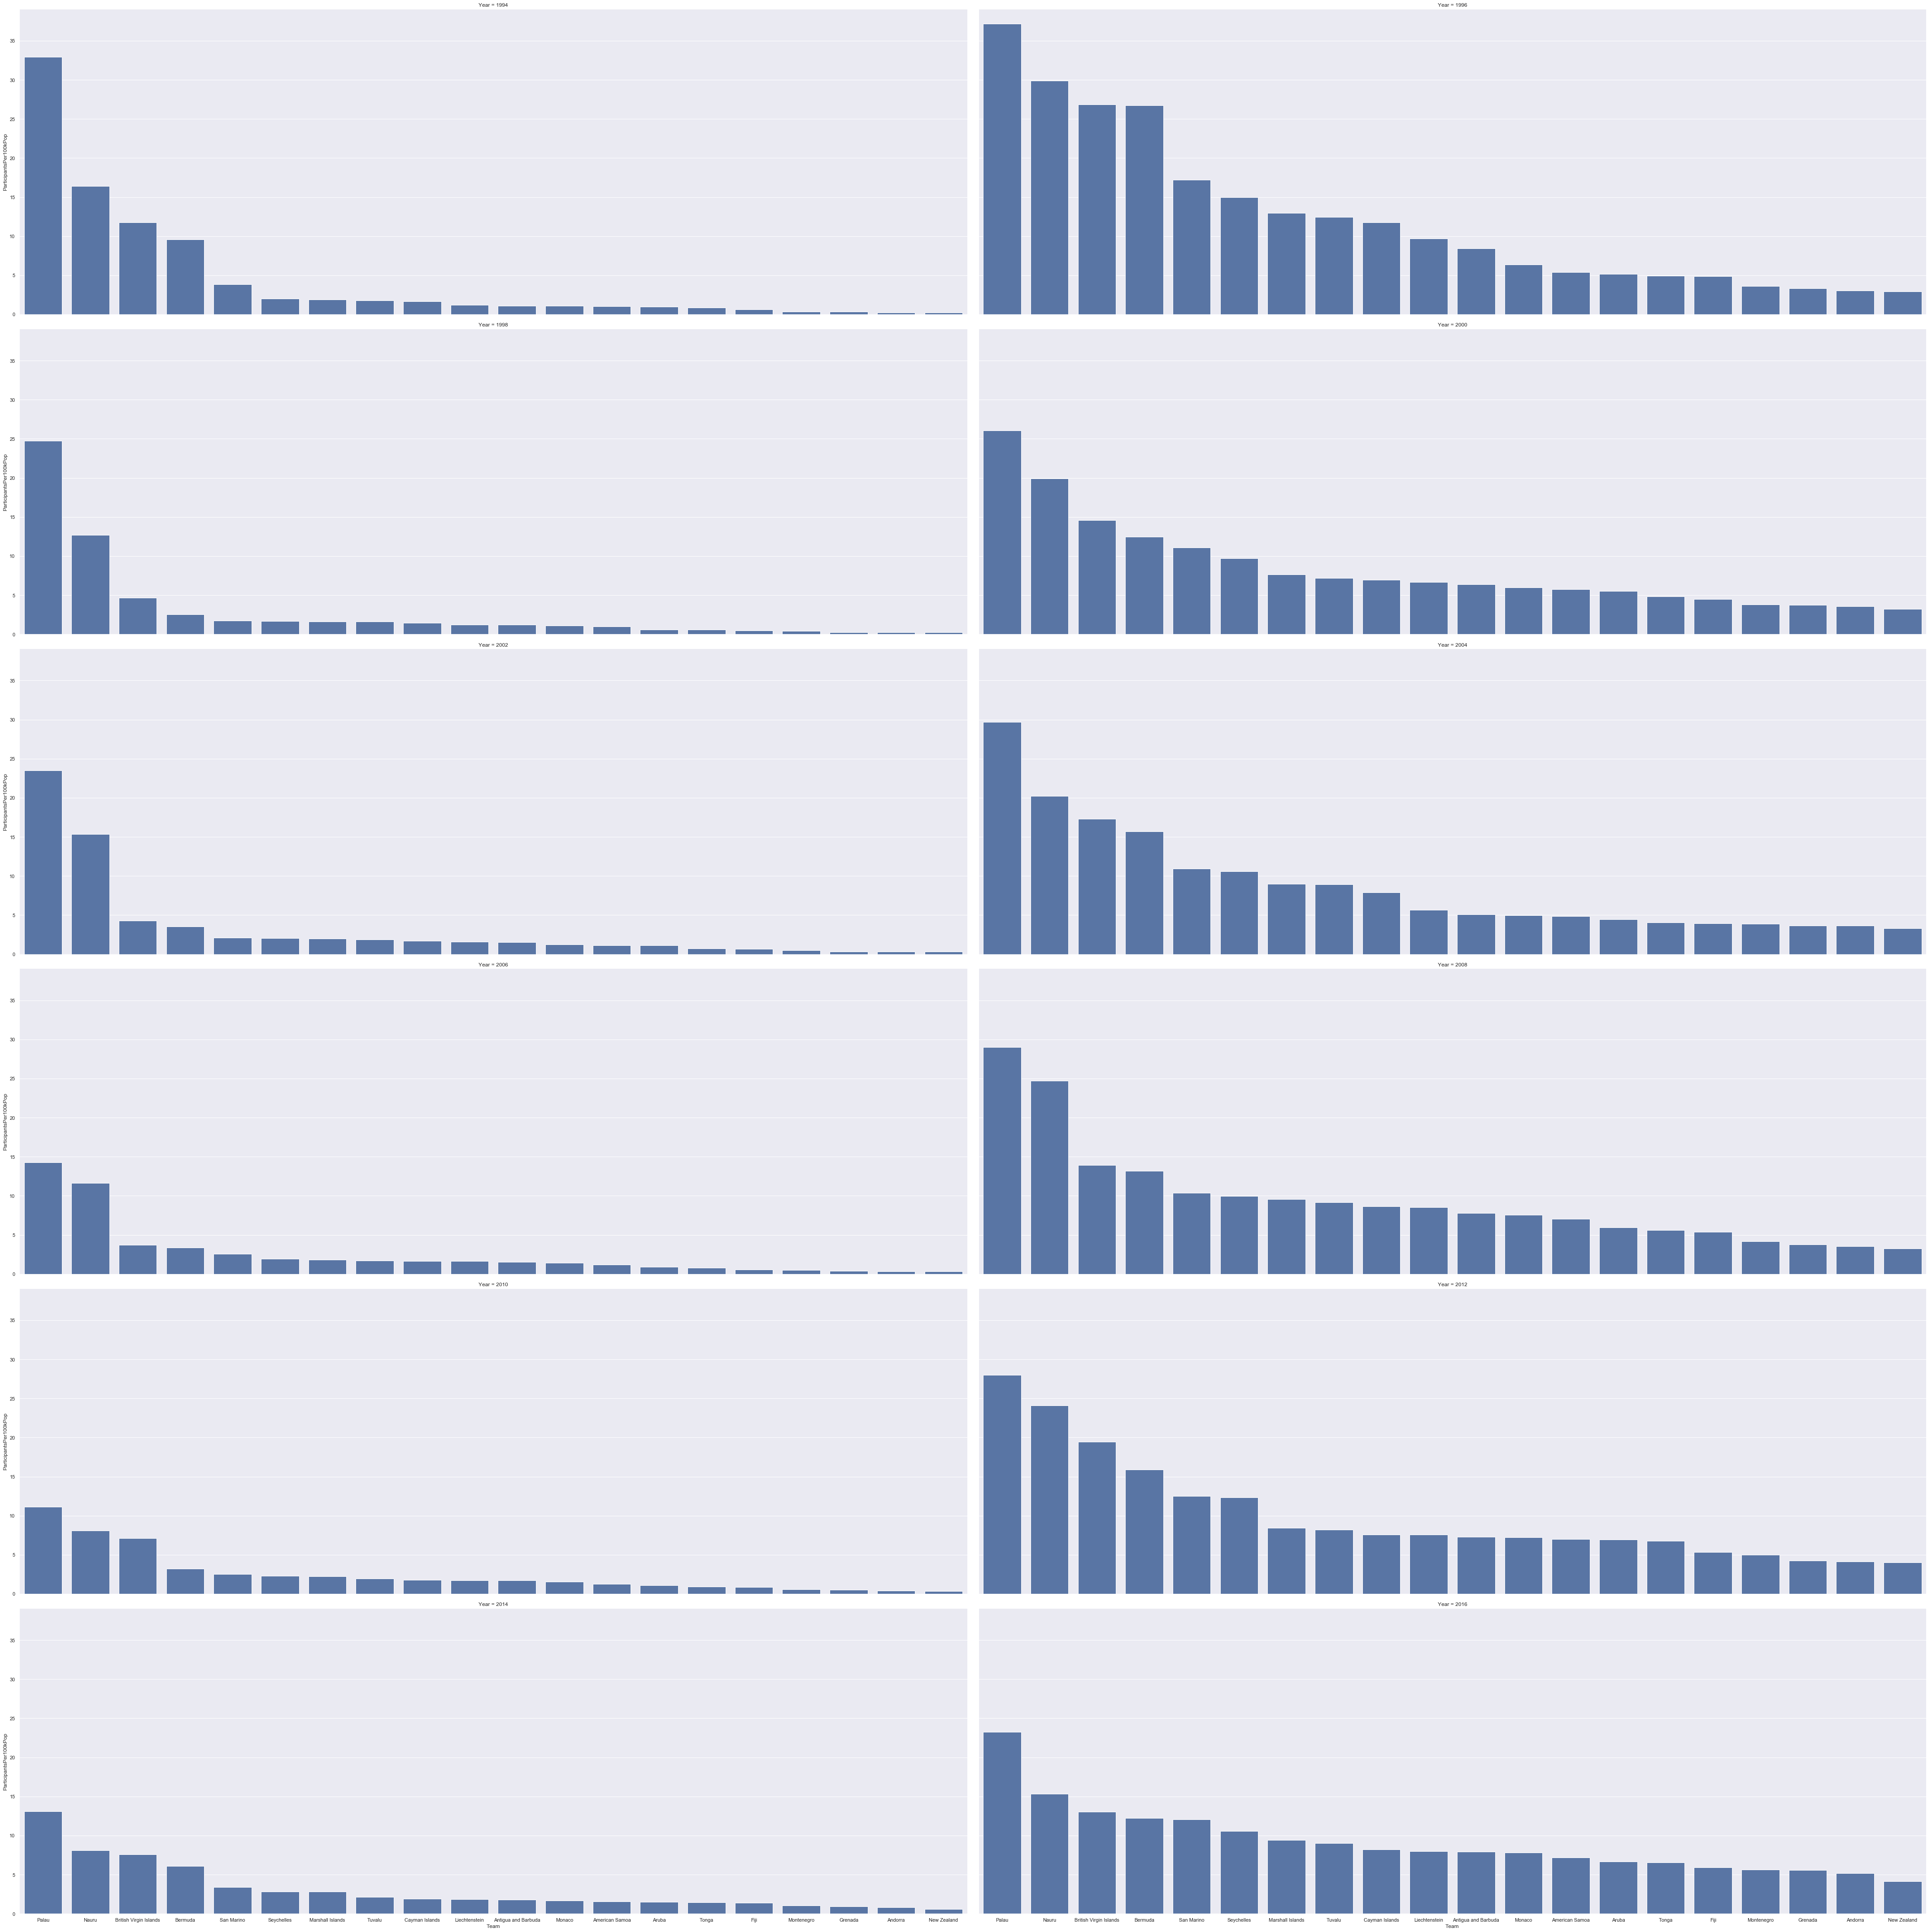

In [91]:
plt.figure(figsize=(20,12))
Per100kG = sns.FacetGrid(data=ParticipantsPer100kPop, col='Year',height=10, aspect=3, col_wrap=2)
for i in range(len(years)):
    labels_to_set = ParticipantsPer100kPop[ParticipantsPer100kPop['Year']==years[i]]['Team']
    #print(labels_to_set)
    #Per100kG.axes[i].set_xticklabels(labels=labels_to_set)
    Per100kG.axes[i].set_xlabel('OCA MU JEBEM')
Per100kG = Per100kG.map(sns.barplot, "Team","ParticipantsPer100kPop")   
for i in range(len(years)):
    labels_to_set = ParticipantsPer100kPop[ParticipantsPer100kPop['Year']==years[i]]['Team']
    #print(labels_to_set)
    Per100kG.axes[i].set_xticklabels(labels=labels_to_set)
    #Per100kG.axes[i].set_xlabel('OCA MU JEBEM')

In [92]:
for i in range(len(years)):
    labels_to_set = ParticipantsPer100kPop[ParticipantsPer100kPop['Year']==years[i]]['Team']
    print(labels_to_set)
    

34             Liechtenstein
39                    Monaco
48                San Marino
1                    Andorra
0             American Samoa
43                    Norway
27                   Iceland
19                   Estonia
8                    Bermuda
21                   Finland
50                  Slovenia
33                    Latvia
5                    Austria
53                    Sweden
54               Switzerland
17            Czech Republic
12                    Canada
6                    Belarus
9     Bosnia and Herzegovina
36                Luxembourg
Name: Team, dtype: object
86     British Virgin Islands
168                     Nauru
93             Cayman Islands
190                San Marino
66        Antigua and Barbuda
80                    Bermuda
63             American Samoa
64                    Andorra
194                Seychelles
162                    Monaco
108                  Dominica
149             Liechtenstein
124                      Guam
212 

In [36]:
grupa1 = athletes1994.groupby(['Year','Sex'])['Age'].mean()
grupa1 = pd.DataFrame(grupa1)
grupa1.reset_index(inplace=True)

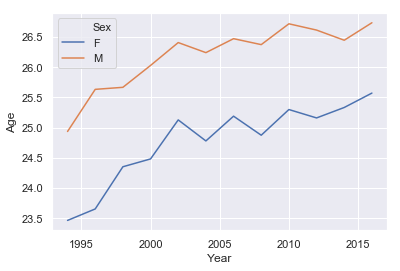

In [37]:
sns.lineplot(data=grupa1,x='Year',y='Age', hue='Sex')

In [38]:
grupa2 = athletes1994.groupby(['Year','Season'])['Age'].mean()
grupa2 = pd.DataFrame(grupa2)
grupa2.reset_index(inplace=True)

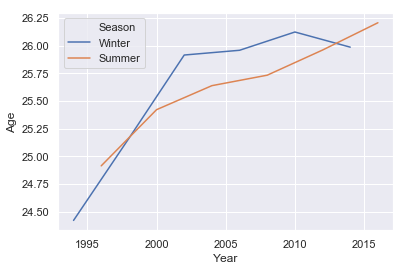

In [39]:
sns.lineplot(data=grupa2,x='Year',y='Age', hue='Season')

In [40]:
years = np.sort(athletes1994['Year'].unique())
print(years)

#dictionary of all years
year_dict = {}
for y in years:
    year_dict[y] = athletes1994[athletes1994['Year']==y]

[1994 1996 1998 2000 2002 2004 2006 2008 2010 2012 2014 2016]


In [41]:
print(year_dict)

{1994:             ID                                    Name Sex   Age  Height  \
8            5                Christine Jacoba Aaftink   F  27.0   185.0   
9            5                Christine Jacoba Aaftink   F  27.0   185.0   
14           6                         Per Knut Aaland   M  33.0   188.0   
15           6                         Per Knut Aaland   M  33.0   188.0   
16           6                         Per Knut Aaland   M  33.0   188.0   
17           6                         Per Knut Aaland   M  33.0   188.0   
22           7                            John Aalberg   M  33.0   183.0   
23           7                            John Aalberg   M  33.0   183.0   
24           7                            John Aalberg   M  33.0   183.0   
25           7                            John Aalberg   M  33.0   183.0   
34          14          Pirjo Hannele Aalto (Mattila-)   F  32.0   171.0   
63          20                      Kjetil Andr Aamodt   M  22.0   176.0   
64   

# Based on following graphs we can conclude that average weight of olympians is continuously growing since 1960.

In [42]:
grupa3 = athletes.groupby(['Year','Sex'])['Height'].mean()
grupa3 = pd.DataFrame(grupa3)
grupa3.reset_index(inplace=True)

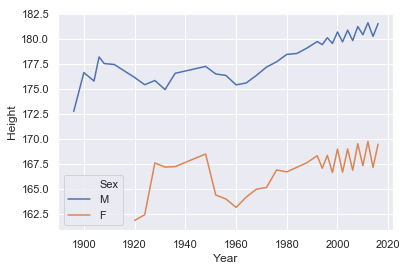

In [43]:
sns.lineplot(data=grupa3,x='Year',y='Height', hue='Sex')

In [44]:
grupa4 = athletes.groupby(['Year','Season'])['Height'].mean()
grupa4 = pd.DataFrame(grupa4)
grupa4.reset_index(inplace=True)

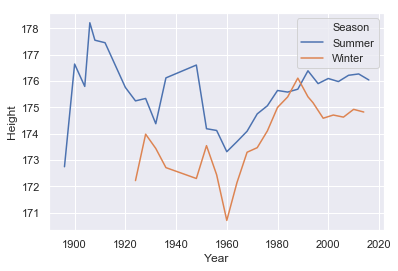

In [45]:
sns.lineplot(data=grupa4,x='Year',y='Height', hue='Season')

# Number of sports and events was growing between 1960s and 1990s but since then is stagnating

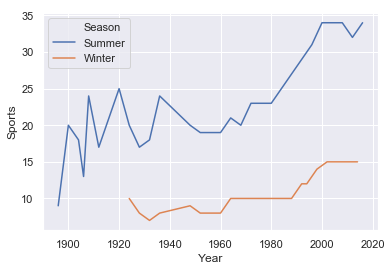

In [46]:
g3=pd.DataFrame(athletes.groupby(['Year','Season'])['Sport'].nunique())
g3.columns=['Sports']
g3.reset_index(inplace=True)
sns.lineplot(data=g3, x='Year',y='Sports',hue='Season')

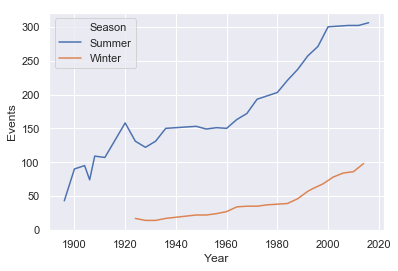

In [47]:
g4=pd.DataFrame(athletes.groupby(['Year','Season'])['Event'].nunique())
g4.columns=['Events']
g4.reset_index(inplace = True)
sns.lineplot(data=g4, x='Year',y='Events',hue='Season')